# GRU

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


Import thư viện

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.optimizers import Adam
import math
from sklearn.metrics import mean_squared_error,  mean_absolute_percentage_error, mean_squared_error

Tạo hàm đánh giá

In [4]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# BTC Coin

In [46]:
# BTC Coin
BTCCoin = pd.read_csv('Bitcoin Historical Data.csv')

In [47]:
# Chuyển đổi cột Price sang kiểu số, loại bỏ dấu phẩy nếu có
BTCCoin['Price'] = BTCCoin['Price'].astype(str).str.replace(',', '').astype(float)

# Chuyển đổi cột 'Date' sang định dạng ngày tháng
BTCCoin['Date'] = pd.to_datetime(BTCCoin['Date'])

# Đặt cột 'Date' làm chỉ số
BTCCoin.set_index('Date', inplace=True)
BTCCoin.sort_values('Date', inplace=True)

Scaler data

In [48]:
# Chọn giá trị Price
dataset_BTCcoin = BTCCoin.Price.values
# Reshaping 1D to 2D array
dataset_BTCcoin = np.reshape(dataset_BTCcoin, (-1,1))

In [50]:
# Đánh dấu sửa đổi: Sử dụng scaler.fit_transform cho toàn bộ dữ liệu
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_BTCcoin = scaler.fit_transform(dataset_BTCcoin)

## Chia 8:2

In [51]:
# Chọn 80% dữ liệu cho training
training_data_len_BTCcoin_82 = math.ceil(len(BTCCoin) * .8)

# Splitting the dataset
train_data_BTC_82 = BTCCoin[:training_data_len_BTCcoin_82]
test_data_BTC_82 = BTCCoin[training_data_len_BTCcoin_82:]

In [52]:
# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_BTCcoin_82 = scaled_BTCcoin[:training_data_len_BTCcoin_82]
scaled_test_BTCcoin_82 = scaled_BTCcoin[training_data_len_BTCcoin_82:]

In [53]:
# Chuẩn bị dữ liệu huấn luyện
X_train_BTCcoin_82 = []
y_train_BTCcoin_82 = []
for i in range(50, len(scaled_train_BTCcoin_82)):
    X_train_BTCcoin_82.append(scaled_train_BTCcoin_82[i-50:i, 0])
    y_train_BTCcoin_82.append(scaled_train_BTCcoin_82[i, 0])

In [54]:
# Chuẩn bị dữ liệu kiểm tra
last_50_days_train_BTCcoin_82 = scaled_train_BTCcoin_82[-50:]
full_test_input_BTCcoin_82 = np.concatenate((last_50_days_train_BTCcoin_82, scaled_test_BTCcoin_82), axis=0)
X_test_BTCcoin_82 = []
for i in range(50, len(full_test_input_BTCcoin_82)):
    X_test_BTCcoin_82.append(full_test_input_BTCcoin_82[i-50:i, 0])

In [55]:
# Chuyển đổi tập train thành mảng Numpy
X_train_BTCcoin_82, y_train_BTCcoin_82 = np.array(X_train_BTCcoin_82), np.array(y_train_BTCcoin_82)

# Reshape dữ liệu tập train
X_train_BTCcoin_82 = np.reshape(X_train_BTCcoin_82, (X_train_BTCcoin_82.shape[0], X_train_BTCcoin_82.shape[1], 1))

# Chuyển đổi tập test thành mảng Numpy
X_test_BTCcoin_82 = np.array(X_test_BTCcoin_82)

# Reshape dữ liệu tập test
X_test_BTCcoin_82 = np.reshape(X_test_BTCcoin_82, (X_test_BTCcoin_82.shape[0], X_test_BTCcoin_82.shape[1], 1))

In [56]:
# Huấn luyện mô hình
regressorGRU_BTCcoin_82 = Sequential()
regressorGRU_BTCcoin_82.add(GRU(50, return_sequences=False, input_shape=(X_train_BTCcoin_82.shape[1], 1)))
regressorGRU_BTCcoin_82.add(Dense(1))

# Compile the regressorGRU_BTCcoin_82
regressorGRU_BTCcoin_82.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_BTCcoin_82.fit(X_train_BTCcoin_82, y_train_BTCcoin_82, epochs=100, batch_size=64, validation_split=0.2)
y_GRU_BTCcoin_82 = regressorGRU_BTCcoin_82.predict(X_test_BTCcoin_82)
y_GRU_O_BTCcoin_82 = scaler.inverse_transform(y_GRU_BTCcoin_82)

# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu cho dự đoán tiếp theo
last_input_BTCcoin_82 = X_test_BTCcoin_82[-1]

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0466 - val_loss: 0.0040
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0075 - val_loss: 0.0015
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0026 - val_loss: 2.9021e-04
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.4484e-04 - val_loss: 1.5858e-04
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.0599e-04 - val_loss: 1.8773e-04
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.9181e-04 - val_loss: 1.5322e-04
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.4647e-04 - val_loss: 1.6777e-04
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 3.5147e-04 - val_loss: 1.2275e-04
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 3.2550e-04 - val_loss: 1.5465e-04
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.5112e-04 - val_loss: 1.1981e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 3.1263e-04 - val_loss: 1.2860e

### Dự đoán 30 ngày tiếp theo

In [57]:
# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BTCcoin_82 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_BTCcoin_82 = regressorGRU_BTCcoin_82.predict(last_input_BTCcoin_82.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BTCcoin_82.append(next_pred_BTCcoin_82[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BTCcoin_82 = np.append(last_input_BTCcoin_82[1:], next_pred_BTCcoin_82)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BTCcoin_82 = scaler.inverse_transform(np.array(predicted_prices_BTCcoin_82).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

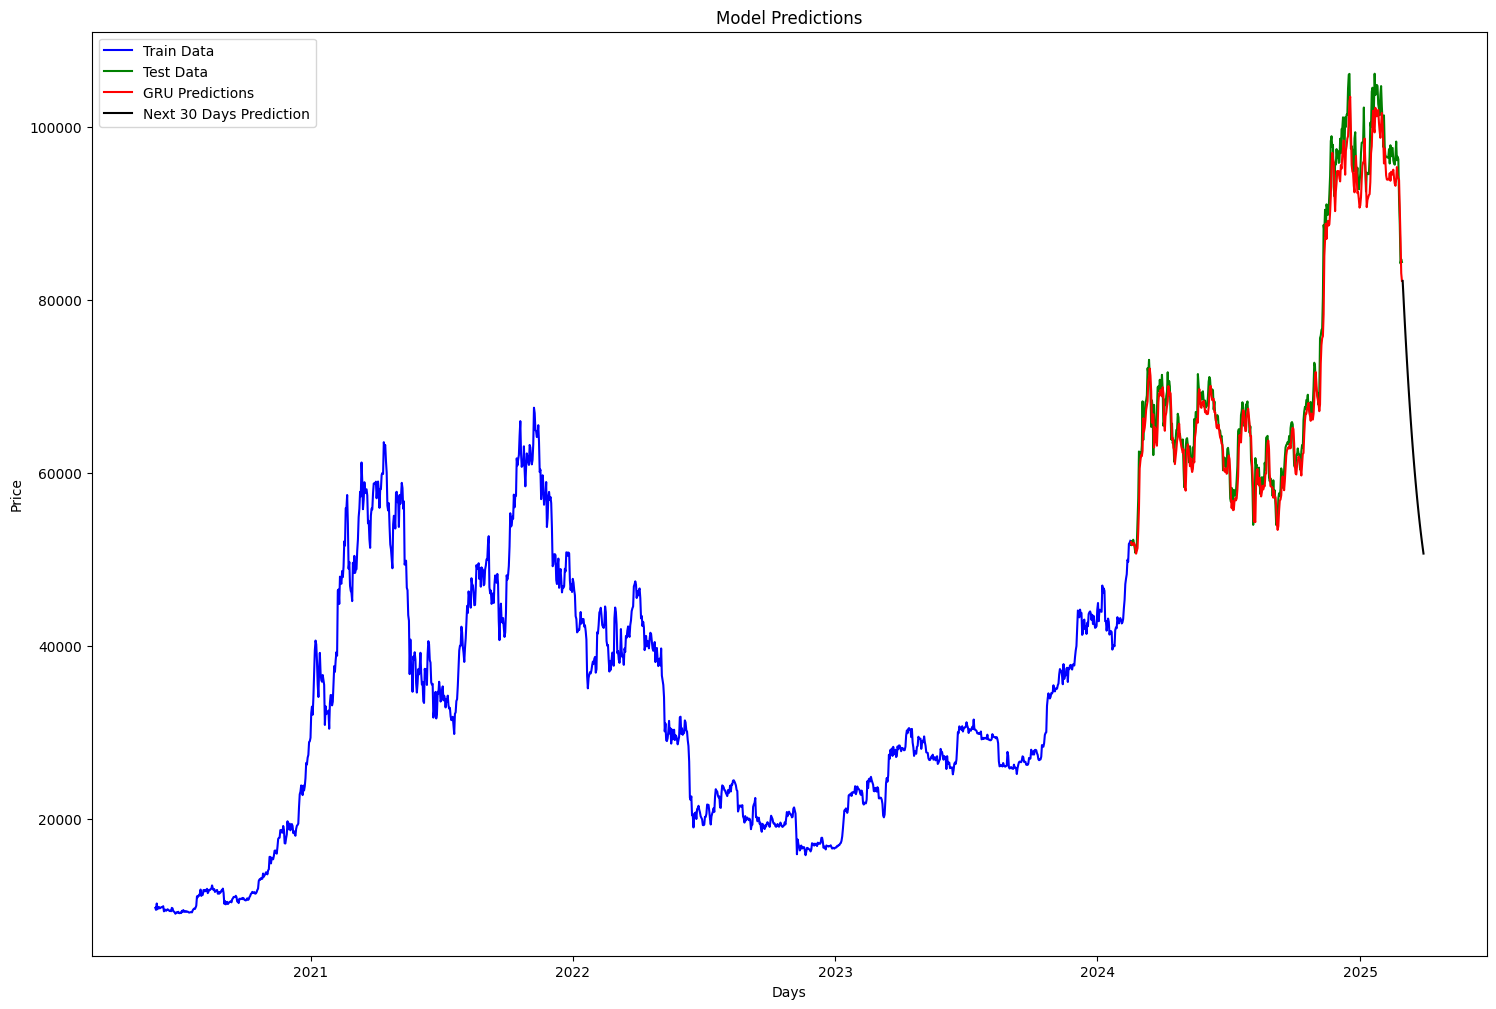

In [58]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_82.index[150:], train_data_BTC_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_82.index, test_data_BTC_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_82.index[0:], y_GRU_O_BTCcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_BTCCoin_82 = pd.date_range(test_data_BTC_82.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_BTCCoin_82, predicted_prices_BTCcoin_82, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin82_predictions_30days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 60 ngày tiếp theo

In [59]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BTCcoin_60days_82 = X_test_BTCcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BTCcoin_60days_82 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_BTCcoin_60days_82 = regressorGRU_BTCcoin_82.predict(last_input_BTCcoin_60days_82.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BTCcoin_60days_82.append(next_pred_BTCcoin_60days_82[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BTCcoin_60days_82 = np.append(last_input_BTCcoin_60days_82[1:], next_pred_BTCcoin_60days_82)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BTCcoin_60days_82 = scaler.inverse_transform(np.array(predicted_prices_BTCcoin_60days_82).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

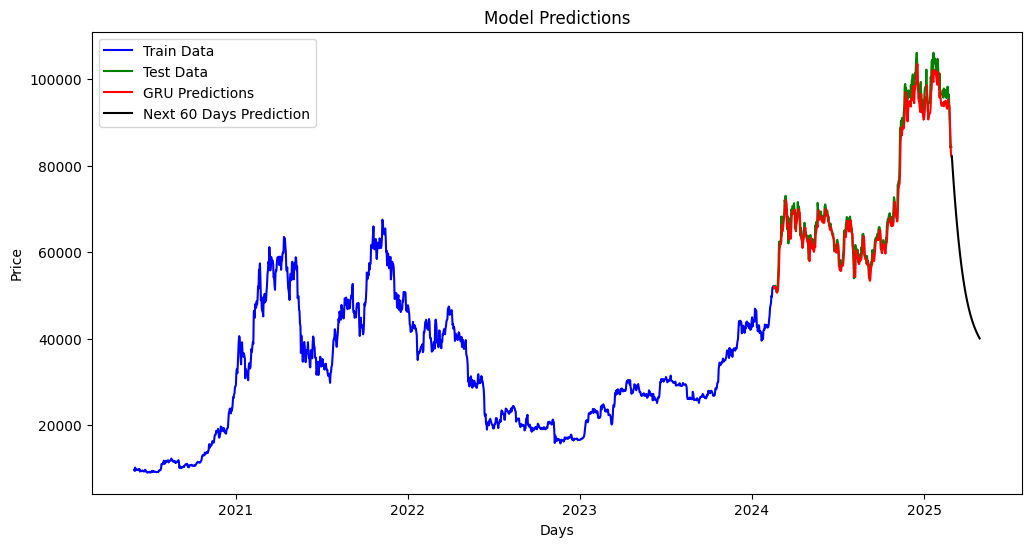

In [60]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 60 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_82.index[150:], train_data_BTC_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_82.index, test_data_BTC_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_82.index[0:], y_GRU_O_BTCcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 60 ngày tiếp theo
next_60_days_BTCcoin_82 = pd.date_range(test_data_BTC_82.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_BTCcoin_82, predicted_prices_BTCcoin_60days_82, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin82_predictions_60days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 90 ngày tiếp theo

In [61]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BTCcoin_90days_82 = X_test_BTCcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BTCcoin_90days_82 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_BTCcoin_90days_82 = regressorGRU_BTCcoin_82.predict(last_input_BTCcoin_90days_82.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BTCcoin_90days_82.append(next_pred_BTCcoin_90days_82[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BTCcoin_90days_82 = np.append(last_input_BTCcoin_90days_82[1:], next_pred_BTCcoin_90days_82)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BTCcoin_90days_82 = scaler.inverse_transform(np.array(predicted_prices_BTCcoin_90days_82).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

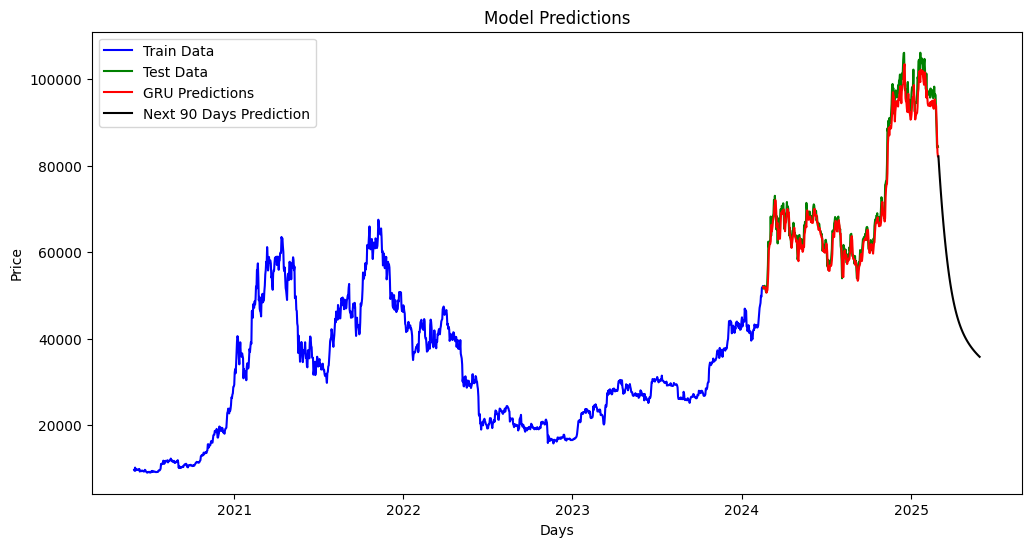

In [62]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 90 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_82.index[150:], train_data_BTC_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_82.index, test_data_BTC_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_82.index[0:], y_GRU_O_BTCcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 90 ngày tiếp theo
next_90_days_BTCcoin_82 = pd.date_range(test_data_BTC_82.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_BTCcoin_82, predicted_prices_BTCcoin_90days_82, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin82_predictions_90days.png", dpi=300, bbox_inches="tight")
plt.show()

### Biểu đồ dự đoán từ mô hình GRU

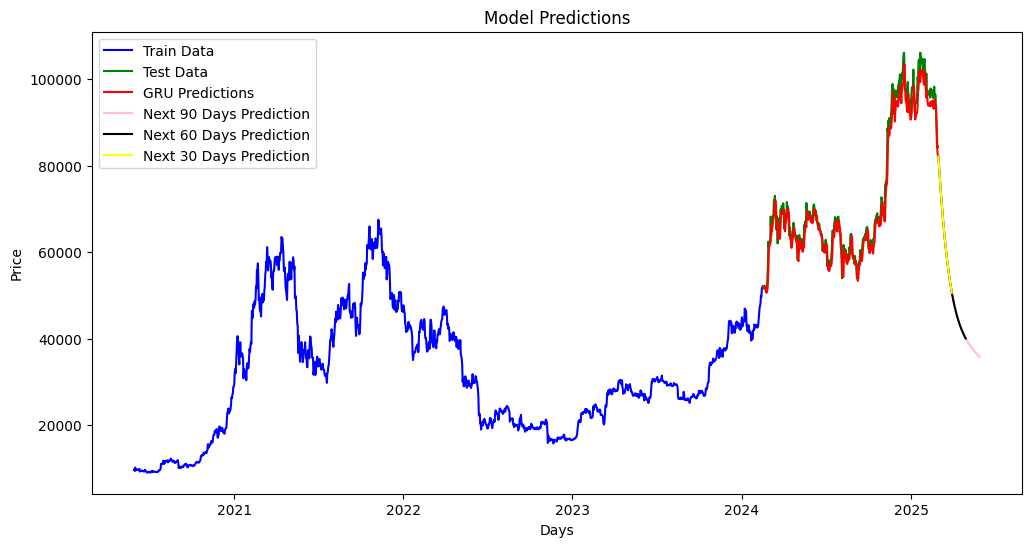

In [63]:
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_82.index[150:], train_data_BTC_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_82.index, test_data_BTC_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_82.index[0:], y_GRU_O_BTCcoin_82, label="GRU Predictions", color="red")

plt.plot(next_90_days_BTCcoin_82, predicted_prices_BTCcoin_90days_82, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_BTCcoin_82, predicted_prices_BTCcoin_60days_82, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_BTCCoin_82, predicted_prices_BTCcoin_82, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin82_predictions.png", dpi=300, bbox_inches="tight")
plt.show()

### Đánh giá mô hình

In [64]:
actual_prices_BTCcoin_82 = test_data_BTC_82.Price.values
actual_prices_BTCcoin_82 = np.reshape(actual_prices_BTCcoin_82, (-1, 1))

mape_BTCcoin_82 = calculate_mape(actual_prices_BTCcoin_82, y_GRU_O_BTCcoin_82)
mse_BTCcoin_82 = calculate_mse(actual_prices_BTCcoin_82, y_GRU_O_BTCcoin_82)
rmse_BTCcoin_82 = calculate_rmse(actual_prices_BTCcoin_82, y_GRU_O_BTCcoin_82)

print("MAPE: ", mape_BTCcoin_82)
print("MSE: ", mse_BTCcoin_82)
print("RMSE: ", rmse_BTCcoin_82)

MAPE:  2.527451601912344
MSE:  6161198.426728852
RMSE:  2482.1761474014797


## Chia 7:3

In [65]:
# Setting 70 percent data for training
training_data_len_BTCcoin_73 = math.ceil(len(BTCCoin) * .7)

# Splitting the dataset
train_data_BTC_73 = BTCCoin[:training_data_len_BTCcoin_73]
test_data_BTC_73 = BTCCoin[training_data_len_BTCcoin_73:]

In [66]:
# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_BTCcoin_73 = scaled_BTCcoin[:training_data_len_BTCcoin_73]
scaled_test_BTCcoin_73 = scaled_BTCcoin[training_data_len_BTCcoin_73:]

In [67]:
X_train_BTCcoin_73 = []
y_train_BTCcoin_73 = []
for i in range(50, len(scaled_train_BTCcoin_73)):
    X_train_BTCcoin_73.append(scaled_train_BTCcoin_73[i-50:i, 0])
    y_train_BTCcoin_73.append(scaled_train_BTCcoin_73[i, 0])

In [68]:
last_50_days_train_BTCcoin_73 = scaled_train_BTCcoin_73[-50:]
full_test_input_BTCcoin_73 = np.concatenate((last_50_days_train_BTCcoin_73, scaled_test_BTCcoin_73), axis=0)
X_test_BTCcoin_73 = []
for i in range(50, len(full_test_input_BTCcoin_73)):
    X_test_BTCcoin_73.append(full_test_input_BTCcoin_73[i-50:i, 0])

In [69]:
# The data is converted to Numpy array
X_train_BTCcoin_73, y_train_BTCcoin_73 = np.array(X_train_BTCcoin_73), np.array(y_train_BTCcoin_73)

# Reshaping
X_train_BTCcoin_73 = np.reshape(X_train_BTCcoin_73, (X_train_BTCcoin_73.shape[0], X_train_BTCcoin_73.shape[1], 1))

# The data is converted to numpy array
X_test_BTCcoin_73 = np.array(X_test_BTCcoin_73)

# Reshaping
X_test_BTCcoin_73 = np.reshape(X_test_BTCcoin_73, (X_test_BTCcoin_73.shape[0], X_test_BTCcoin_73.shape[1], 1))

In [70]:
# Huấn luyện mô hình
regressorGRU_BTCcoin_73 = Sequential()
regressorGRU_BTCcoin_73.add(GRU(50, return_sequences=False, input_shape=(X_train_BTCcoin_73.shape[1], 1)))
regressorGRU_BTCcoin_73.add(Dense(1))

# Compile the regressorGRU_BTCcoin_73
regressorGRU_BTCcoin_73.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_BTCcoin_73.fit(X_train_BTCcoin_73, y_train_BTCcoin_73, epochs=100, batch_size=64, validation_split=0.3)
y_GRU_BTCcoin_73 = regressorGRU_BTCcoin_73.predict(X_test_BTCcoin_73)
y_GRU_O_BTCcoin_73 = scaler.inverse_transform(y_GRU_BTCcoin_73)
last_input_BTCcoin_73 = X_test_BTCcoin_73[-1]

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.1129 - val_loss: 0.0051
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0183 - val_loss: 0.0135
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0121 - val_loss: 0.0014
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0062 - val_loss: 0.0017
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0022 - val_loss: 1.8479e-04
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 6.7712e-04 - val_loss: 1.4752e-04
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 6.0979e-04 - val_loss: 1.2814e-04
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6.1494e-04 - val_loss: 1.0168e-04
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 5.1368e-04 - val_loss: 9.9564e-05
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 5.0372e-04 - val_loss: 1.1060e-04
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 5.0757e-04 - val_loss: 1.0466e-04
Epoch 12/100

### Dự đoán 30 ngày

In [71]:
# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BTCcoin_73 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_BTCcoin_73 = regressorGRU_BTCcoin_73.predict(last_input_BTCcoin_73.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BTCcoin_73.append(next_pred_BTCcoin_73[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BTCcoin_73 = np.append(last_input_BTCcoin_73[1:], next_pred_BTCcoin_73)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BTCcoin_73 = scaler.inverse_transform(np.array(predicted_prices_BTCcoin_73).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

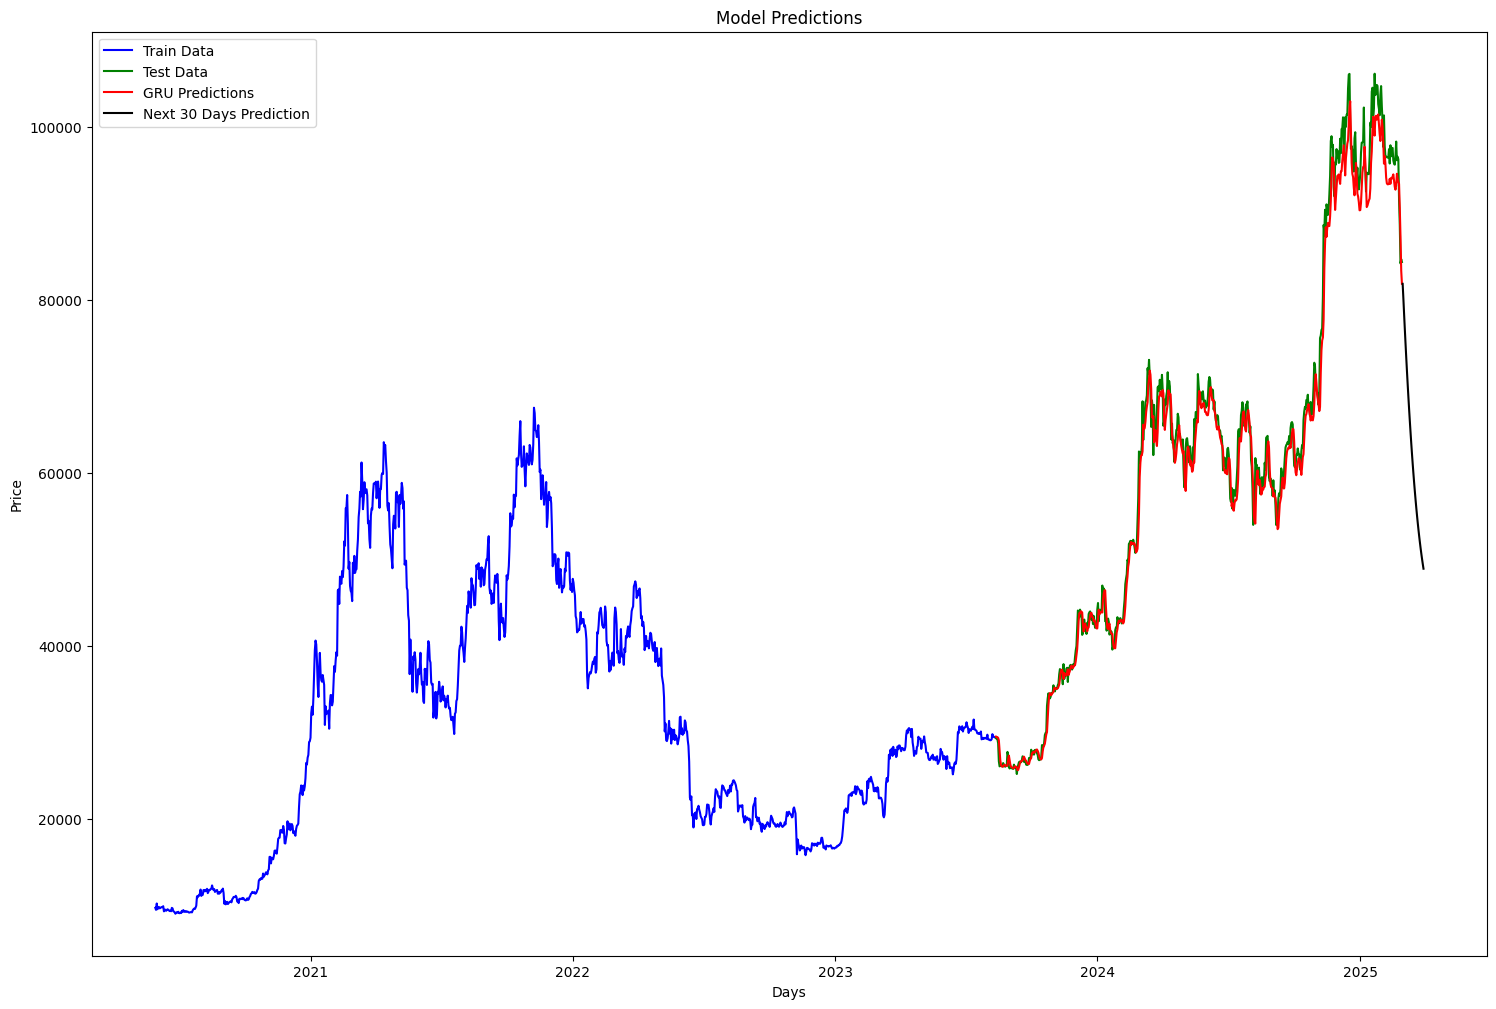

In [139]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_73.index[150:], train_data_BTC_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_73.index, test_data_BTC_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_73.index[0:], y_GRU_O_BTCcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_BTCCoin_73 = pd.date_range(test_data_BTC_73.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_BTCCoin_73, predicted_prices_BTCcoin_73, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin73_predictions_30days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 60 ngày

In [73]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BTCcoin_60days_73 = X_test_BTCcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BTCcoin_60days_73 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_BTCcoin_60days_73 = regressorGRU_BTCcoin_73.predict(last_input_BTCcoin_60days_73.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BTCcoin_60days_73.append(next_pred_BTCcoin_60days_73[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BTCcoin_60days_73 = np.append(last_input_BTCcoin_60days_73[1:], next_pred_BTCcoin_60days_73)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BTCcoin_60days_73 = scaler.inverse_transform(np.array(predicted_prices_BTCcoin_60days_73).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

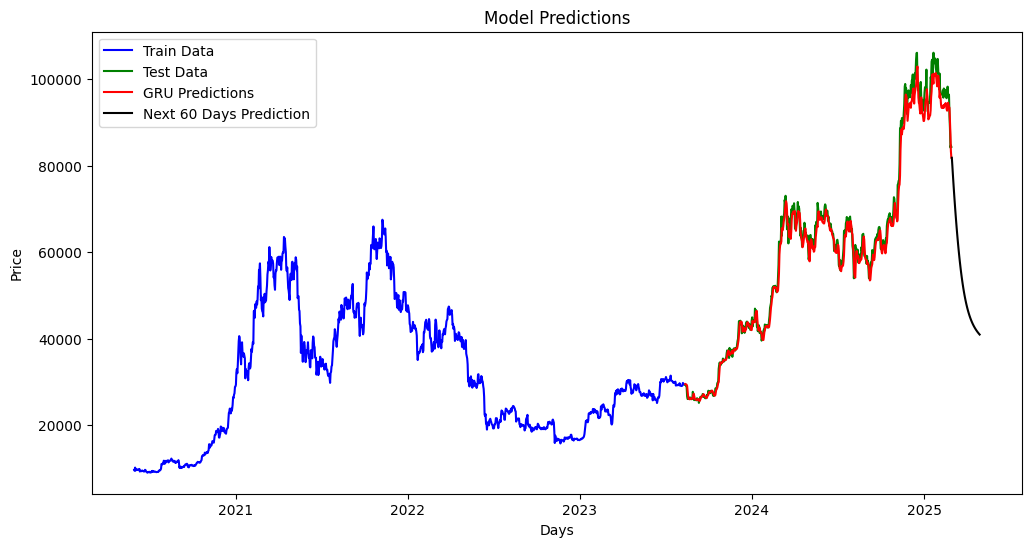

In [74]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 60 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_73.index[150:], train_data_BTC_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_73.index, test_data_BTC_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_73.index[0:], y_GRU_O_BTCcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 60 ngày tiếp theo
next_60_days_BTCcoin_73 = pd.date_range(test_data_BTC_73.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_BTCcoin_73, predicted_prices_BTCcoin_60days_73, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin73_predictions_60days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 90 ngày

In [75]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BTCcoin_90days_73 = X_test_BTCcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BTCcoin_90days_73 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_BTCcoin_90days_73 = regressorGRU_BTCcoin_73.predict(last_input_BTCcoin_90days_73.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BTCcoin_90days_73.append(next_pred_BTCcoin_90days_73[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BTCcoin_90days_73 = np.append(last_input_BTCcoin_90days_73[1:], next_pred_BTCcoin_90days_73)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BTCcoin_90days_73 = scaler.inverse_transform(np.array(predicted_prices_BTCcoin_90days_73).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

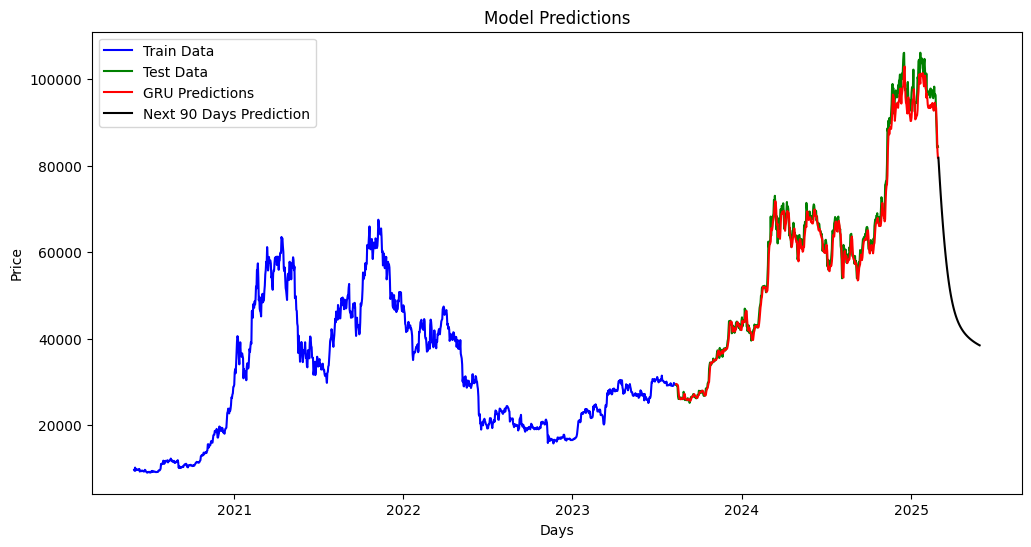

In [76]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 90 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_73.index[150:], train_data_BTC_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_73.index, test_data_BTC_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_73.index[0:], y_GRU_O_BTCcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 90 ngày tiếp theo
next_90_days_BTCcoin_73 = pd.date_range(test_data_BTC_73.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_BTCcoin_73, predicted_prices_BTCcoin_90days_73, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin73_predictions_90days.png", dpi=300, bbox_inches="tight")
plt.show()

### Biểu đồ dự đoán từ mô hình GRU

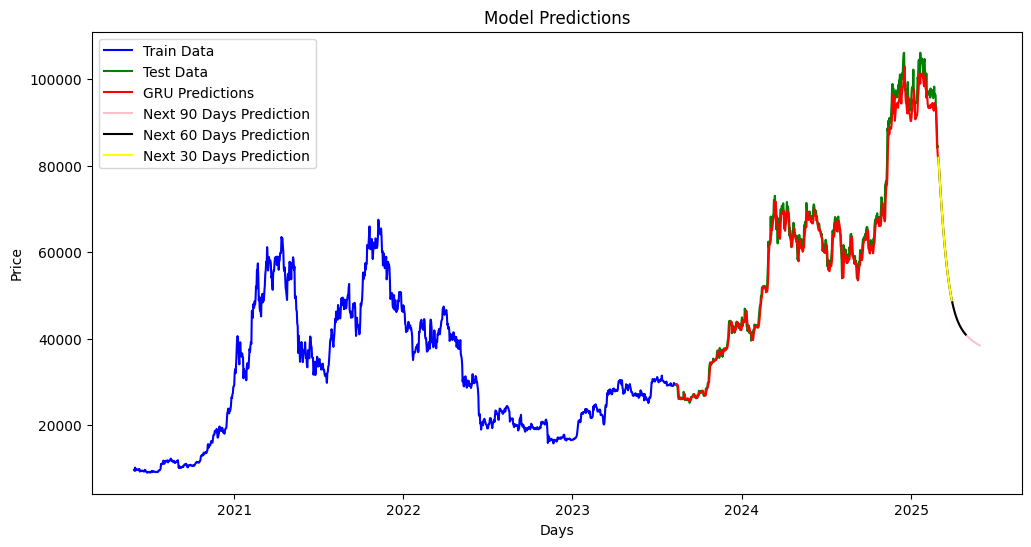

In [77]:
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_73.index[150:], train_data_BTC_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_73.index, test_data_BTC_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_73.index[0:], y_GRU_O_BTCcoin_73, label="GRU Predictions", color="red")

plt.plot(next_90_days_BTCcoin_73, predicted_prices_BTCcoin_90days_73, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_BTCcoin_73, predicted_prices_BTCcoin_60days_73, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_BTCCoin_73, predicted_prices_BTCcoin_73, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin73_predictions.png", dpi=300, bbox_inches="tight")
plt.show()

### Đánh giá mô hình

In [78]:
actual_prices_BTCcoin_73 = test_data_BTC_73.Price.values
actual_prices_BTCcoin_73 = np.reshape(actual_prices_BTCcoin_73, (-1, 1))

mape_BTCcoin_73 = calculate_mape(actual_prices_BTCcoin_73, y_GRU_O_BTCcoin_73)
mse_BTCcoin_73 = calculate_mse(actual_prices_BTCcoin_73, y_GRU_O_BTCcoin_73)
rmse_BTCcoin_73 = calculate_rmse(actual_prices_BTCcoin_73, y_GRU_O_BTCcoin_73)

print("MAPE: ", mape_BTCcoin_73)
print("MSE: ", mse_BTCcoin_73)
print("RMSE: ", rmse_BTCcoin_73)

MAPE:  2.432747958548822
MSE:  5171152.8606453445
RMSE:  2274.0168998152462


## Chia 9:1

In [79]:
# Setting 90 percent data for training
training_data_len_BTCcoin_91 = math.ceil(len(BTCCoin) * .9)

# Splitting the dataset
train_data_BTC_91 = BTCCoin[:training_data_len_BTCcoin_91]
test_data_BTC_91 = BTCCoin[training_data_len_BTCcoin_91:]

In [80]:
# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_BTCcoin_91 = scaled_BTCcoin[:training_data_len_BTCcoin_91]
scaled_test_BTCcoin_91 = scaled_BTCcoin[training_data_len_BTCcoin_91:]

In [81]:
X_train_BTCcoin_91 = []
y_train_BTCcoin_91 = []
for i in range(50, len(scaled_train_BTCcoin_91)):
    X_train_BTCcoin_91.append(scaled_train_BTCcoin_91[i-50:i, 0])
    y_train_BTCcoin_91.append(scaled_train_BTCcoin_91[i, 0])

In [82]:
last_50_days_train_BTCcoin_91 = scaled_train_BTCcoin_91[-50:]
full_test_input_BTCcoin_91 = np.concatenate((last_50_days_train_BTCcoin_91, scaled_test_BTCcoin_91), axis=0)
X_test_BTCcoin_91 = []
for i in range(50, len(full_test_input_BTCcoin_91)):
    X_test_BTCcoin_91.append(full_test_input_BTCcoin_91[i-50:i, 0])

In [83]:
# The data is converted to Numpy array
X_train_BTCcoin_91, y_train_BTCcoin_91 = np.array(X_train_BTCcoin_91), np.array(y_train_BTCcoin_91)

# Reshaping
X_train_BTCcoin_91 = np.reshape(X_train_BTCcoin_91, (X_train_BTCcoin_91.shape[0], X_train_BTCcoin_91.shape[1], 1))

# The data is converted to numpy array
X_test_BTCcoin_91 = np.array(X_test_BTCcoin_91)

# Reshaping
X_test_BTCcoin_91 = np.reshape(X_test_BTCcoin_91, (X_test_BTCcoin_91.shape[0], X_test_BTCcoin_91.shape[1], 1))

In [84]:
# Huấn luyện mô hình
regressorGRU_BTCcoin_91 = Sequential()
regressorGRU_BTCcoin_91.add(GRU(50, return_sequences=False, input_shape=(X_train_BTCcoin_91.shape[1], 1)))
regressorGRU_BTCcoin_91.add(Dense(1))

# Compile the regressorGRU_BTCcoin_91
regressorGRU_BTCcoin_91.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_BTCcoin_91.fit(X_train_BTCcoin_91, y_train_BTCcoin_91, epochs=100, batch_size=64, validation_split=0.1)
y_GRU_BTCcoin_91 = regressorGRU_BTCcoin_91.predict(X_test_BTCcoin_91)
y_GRU_O_BTCcoin_91 = scaler.inverse_transform(y_GRU_BTCcoin_91)
last_input_BTCcoin_91 = X_test_BTCcoin_91[-1]

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0535 - val_loss: 0.0074
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0080 - val_loss: 0.0152
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 4.3289e-04 - val_loss: 7.0404e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 3.7606e-04 - val_loss: 5.9651e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 3.1695e-04 - val_loss: 6.0114e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 3.0874e-04 - val_loss: 6.0934e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 2.7560e-04 - val_loss: 6.0703e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 2.8236e-04 - val_loss: 5.3400e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 2.9032e-04 - val_loss: 5.2573e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 2.6862e-04 - val_loss: 5.4320e-04


### Dự đoán 30 ngày

In [85]:
# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BTCcoin_91 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_BTCcoin_91 = regressorGRU_BTCcoin_91.predict(last_input_BTCcoin_91.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BTCcoin_91.append(next_pred_BTCcoin_91[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BTCcoin_91 = np.append(last_input_BTCcoin_91[1:], next_pred_BTCcoin_91)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BTCcoin_91 = scaler.inverse_transform(np.array(predicted_prices_BTCcoin_91).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

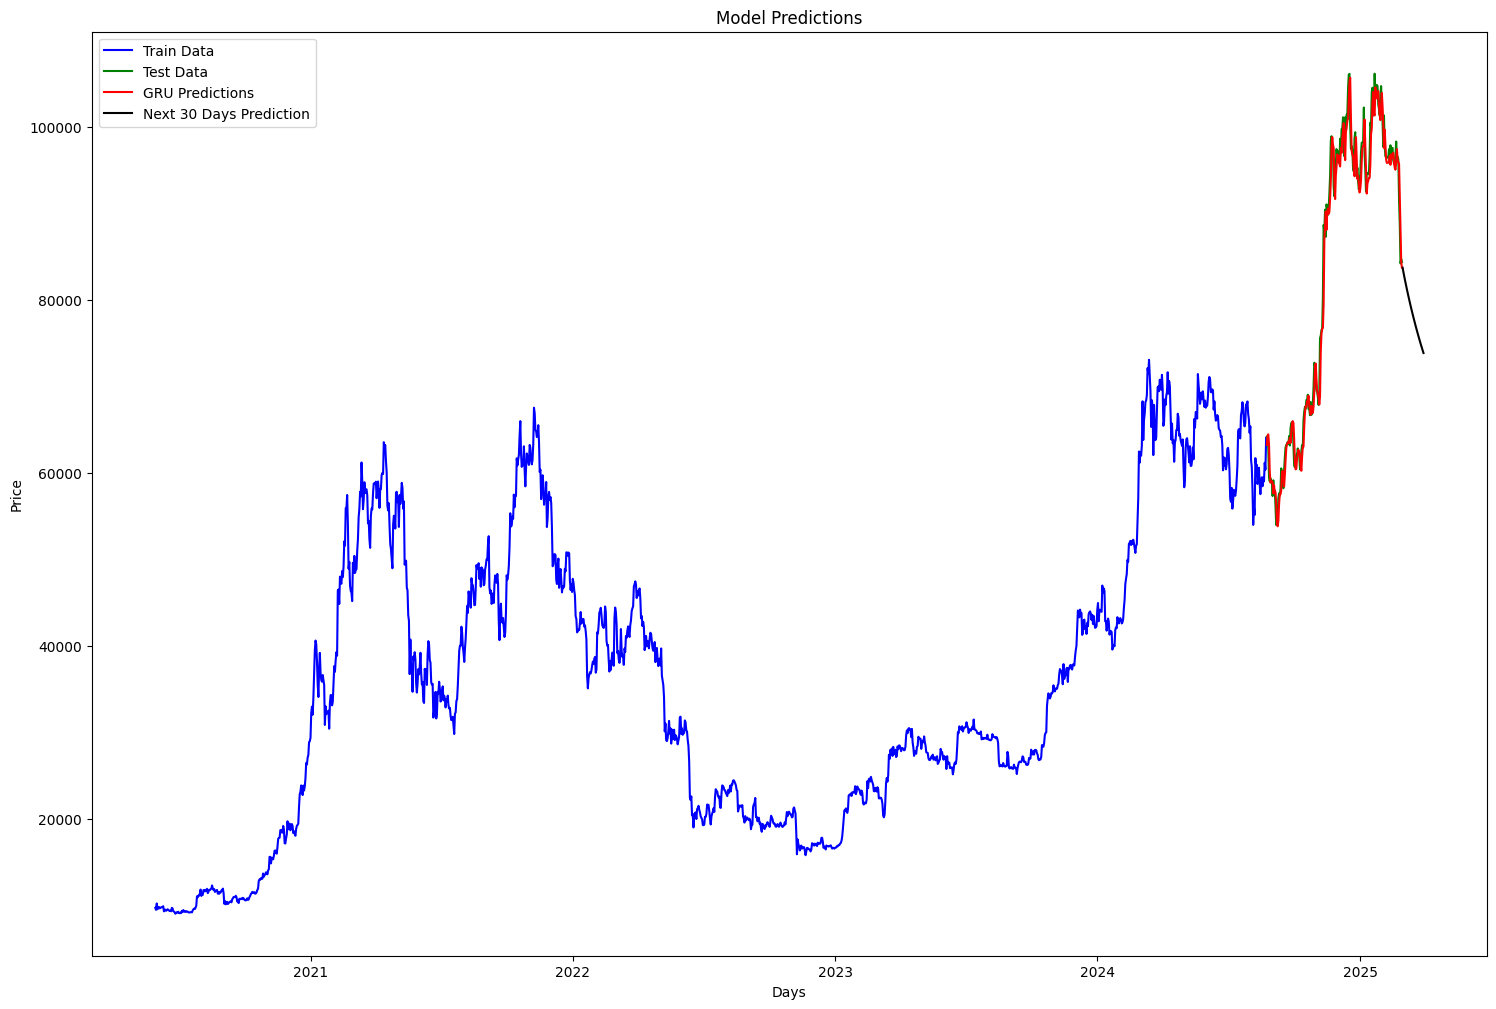

In [86]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_91.index[150:], train_data_BTC_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_91.index, test_data_BTC_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_91.index[0:], y_GRU_O_BTCcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_BTCCoin_91 = pd.date_range(test_data_BTC_91.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_BTCCoin_91, predicted_prices_BTCcoin_91, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin91_predictions_30days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 60 ngày

In [87]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BTCcoin_60days_91 = X_test_BTCcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BTCcoin_60days_91 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_BTCcoin_60days_91 = regressorGRU_BTCcoin_91.predict(last_input_BTCcoin_60days_91.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BTCcoin_60days_91.append(next_pred_BTCcoin_60days_91[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BTCcoin_60days_91 = np.append(last_input_BTCcoin_60days_91[1:], next_pred_BTCcoin_60days_91)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BTCcoin_60days_91 = scaler.inverse_transform(np.array(predicted_prices_BTCcoin_60days_91).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━

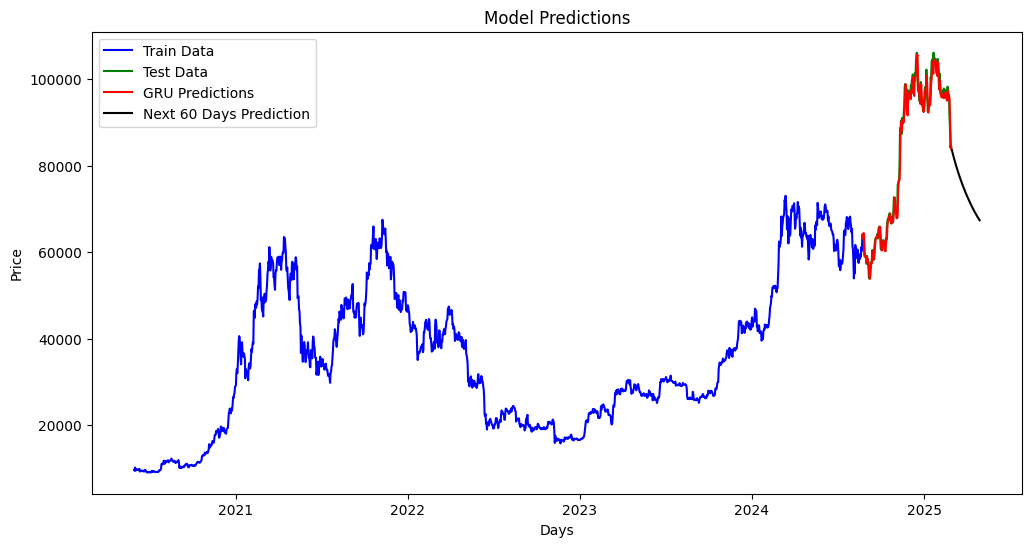

In [88]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 60 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_91.index[150:], train_data_BTC_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_91.index, test_data_BTC_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_91.index[0:], y_GRU_O_BTCcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 60 ngày tiếp theo
next_60_days_BTCcoin_91 = pd.date_range(test_data_BTC_91.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_BTCcoin_91, predicted_prices_BTCcoin_60days_91, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin91_predictions_60days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 90 ngày

In [89]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BTCcoin_90days_91 = X_test_BTCcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BTCcoin_90days_91 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_BTCcoin_90days_91 = regressorGRU_BTCcoin_91.predict(last_input_BTCcoin_90days_91.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BTCcoin_90days_91.append(next_pred_BTCcoin_90days_91[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BTCcoin_90days_91 = np.append(last_input_BTCcoin_90days_91[1:], next_pred_BTCcoin_90days_91)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BTCcoin_90days_91 = scaler.inverse_transform(np.array(predicted_prices_BTCcoin_90days_91).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

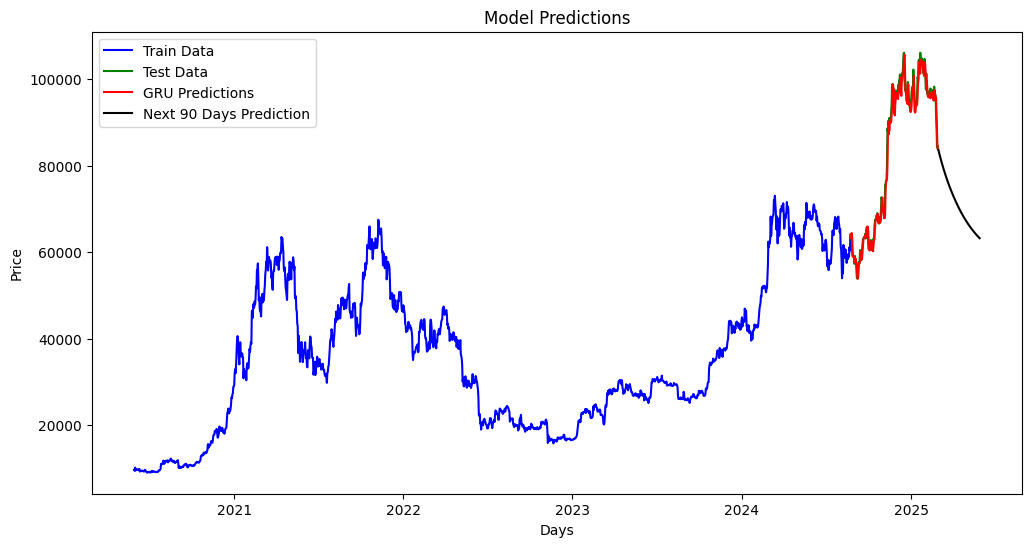

In [90]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 90 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_91.index[150:], train_data_BTC_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_91.index, test_data_BTC_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_91.index[0:], y_GRU_O_BTCcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 90 ngày tiếp theo
next_90_days_BTCcoin_91 = pd.date_range(test_data_BTC_91.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_BTCcoin_91, predicted_prices_BTCcoin_90days_91, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin91_predictions_90days.png", dpi=300, bbox_inches="tight")
plt.show()

### Biểu đồ dự đoán từ mô hình GRU

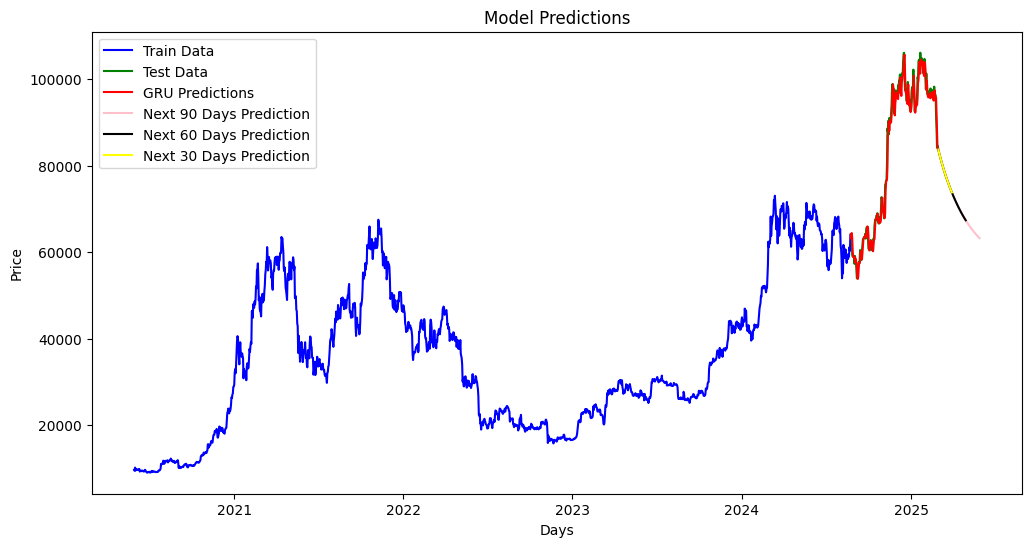

In [91]:
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BTC_91.index[150:], train_data_BTC_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BTC_91.index, test_data_BTC_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BTC_91.index[0:], y_GRU_O_BTCcoin_91, label="GRU Predictions", color="red")

plt.plot(next_90_days_BTCcoin_91, predicted_prices_BTCcoin_90days_91, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_BTCcoin_91, predicted_prices_BTCcoin_60days_91, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_BTCCoin_91, predicted_prices_BTCcoin_91, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTCcoin91_predictions.png", dpi=300, bbox_inches="tight")
plt.show()

### Đánh giá mô hình

In [92]:
actual_prices_BTCcoin_91 = test_data_BTC_91.Price.values
actual_prices_BTCcoin_91 = np.reshape(actual_prices_BTCcoin_91, (-1, 1))

mape_BTCcoin_91 = calculate_mape(actual_prices_BTCcoin_91, y_GRU_O_BTCcoin_91)
mse_BTCcoin_91 = calculate_mse(actual_prices_BTCcoin_91, y_GRU_O_BTCcoin_91)
rmse_BTCcoin_91 = calculate_rmse(actual_prices_BTCcoin_91, y_GRU_O_BTCcoin_91)

print("MAPE: ", mape_BTCcoin_91)
print("MSE: ", mse_BTCcoin_91)
print("RMSE: ", rmse_BTCcoin_91)

MAPE:  1.889314277879763
MSE:  4501099.622265427
RMSE:  2121.5795111815696


# ETH Coin

In [93]:
# ETH Coin
ETHCoin = pd.read_csv('Ethereum Historical Data.csv')

In [94]:
# Chuyển đổi cột Price sang kiểu số, loại bỏ dấu phẩy nếu có
ETHCoin['Price'] = ETHCoin['Price'].astype(str).str.replace(',', '').astype(float)

# Chuyển đổi cột 'Date' sang định dạng ngày tháng
ETHCoin['Date'] = pd.to_datetime(ETHCoin['Date'])

# Đặt cột 'Date' làm chỉ số
ETHCoin.set_index('Date', inplace=True)
ETHCoin.sort_values('Date', inplace=True)

Scaler data

In [95]:
# Chọn giá trị Price
dataset_ETHcoin = ETHCoin.Price.values
# Reshaping 1D to 2D array
dataset_ETHcoin = np.reshape(dataset_ETHcoin, (-1,1))

In [96]:
# Đánh dấu sửa đổi: Sử dụng scaler.fit_transform cho toàn bộ dữ liệu
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_ETHcoin = scaler.fit_transform(dataset_ETHcoin)

## Chia 8:2

In [97]:
# Chọn 80% dữ liệu cho training
training_data_len_ETHcoin_82 = math.ceil(len(ETHCoin) * .8)

# Splitting the dataset
train_data_ETH_82 = ETHCoin[:training_data_len_ETHcoin_82]
test_data_ETH_82 = ETHCoin[training_data_len_ETHcoin_82:]

In [98]:
# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_ETHcoin_82 = scaled_ETHcoin[:training_data_len_ETHcoin_82]
scaled_test_ETHcoin_82 = scaled_ETHcoin[training_data_len_ETHcoin_82:]

In [99]:
# Chuẩn bị dữ liệu huấn luyện
X_train_ETHcoin_82 = []
y_train_ETHcoin_82 = []
for i in range(50, len(scaled_train_ETHcoin_82)):
    X_train_ETHcoin_82.append(scaled_train_ETHcoin_82[i-50:i, 0])
    y_train_ETHcoin_82.append(scaled_train_ETHcoin_82[i, 0])

In [100]:
# Chuẩn bị dữ liệu kiểm tra
last_50_days_train_ETHcoin_82 = scaled_train_ETHcoin_82[-50:]
full_test_input_ETHcoin_82 = np.concatenate((last_50_days_train_ETHcoin_82, scaled_test_ETHcoin_82), axis=0)
X_test_ETHcoin_82 = []
for i in range(50, len(full_test_input_ETHcoin_82)):
    X_test_ETHcoin_82.append(full_test_input_ETHcoin_82[i-50:i, 0])

In [101]:
# Chuyển đổi tập train thành mảng Numpy
X_train_ETHcoin_82, y_train_ETHcoin_82 = np.array(X_train_ETHcoin_82), np.array(y_train_ETHcoin_82)

# Reshape dữ liệu tập train
X_train_ETHcoin_82 = np.reshape(X_train_ETHcoin_82, (X_train_ETHcoin_82.shape[0], X_train_ETHcoin_82.shape[1], 1))

# Chuyển đổi tập test thành mảng Numpy
X_test_ETHcoin_82 = np.array(X_test_ETHcoin_82)

# Reshape dữ liệu tập test
X_test_ETHcoin_82 = np.reshape(X_test_ETHcoin_82, (X_test_ETHcoin_82.shape[0], X_test_ETHcoin_82.shape[1], 1))

In [102]:
# Huấn luyện mô hình
regressorGRU_ETHcoin_82 = Sequential()
regressorGRU_ETHcoin_82.add(GRU(50, return_sequences=False, input_shape=(X_train_ETHcoin_82.shape[1], 1)))
regressorGRU_ETHcoin_82.add(Dense(1))

# Compile the regressorGRU_ETHcoin_82
regressorGRU_ETHcoin_82.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_ETHcoin_82.fit(X_train_ETHcoin_82, y_train_ETHcoin_82, epochs=100, batch_size=64, validation_split=0.2)
y_GRU_ETHcoin_82 = regressorGRU_ETHcoin_82.predict(X_test_ETHcoin_82)
y_GRU_O_ETHcoin_82 = scaler.inverse_transform(y_GRU_ETHcoin_82)

# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu cho dự đoán tiếp theo
last_input_ETHcoin_82 = X_test_ETHcoin_82[-1]

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0408 - val_loss: 0.0068
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0063 - val_loss: 4.9756e-04
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0016 - val_loss: 2.1829e-04
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 7.8746e-04 - val_loss: 1.5908e-04
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 6.5358e-04 - val_loss: 1.5518e-04
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.8700e-04 - val_loss: 1.5783e-04
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 7.0177e-04 - val_loss: 1.6878e-04
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 6.3139e-04 - val_loss: 1.4502e-04
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.4359e-04 - val_loss: 1.4093e-04
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 6.3153e-04 - val_loss: 1.5460e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 6.1389e-04 - val_loss: 1.4

### Dự đoán 30 ngày tiếp theo

In [103]:
# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_ETHcoin_82 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_ETHcoin_82 = regressorGRU_ETHcoin_82.predict(last_input_ETHcoin_82.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_ETHcoin_82.append(next_pred_ETHcoin_82[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_ETHcoin_82 = np.append(last_input_ETHcoin_82[1:], next_pred_ETHcoin_82)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_ETHcoin_82 = scaler.inverse_transform(np.array(predicted_prices_ETHcoin_82).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

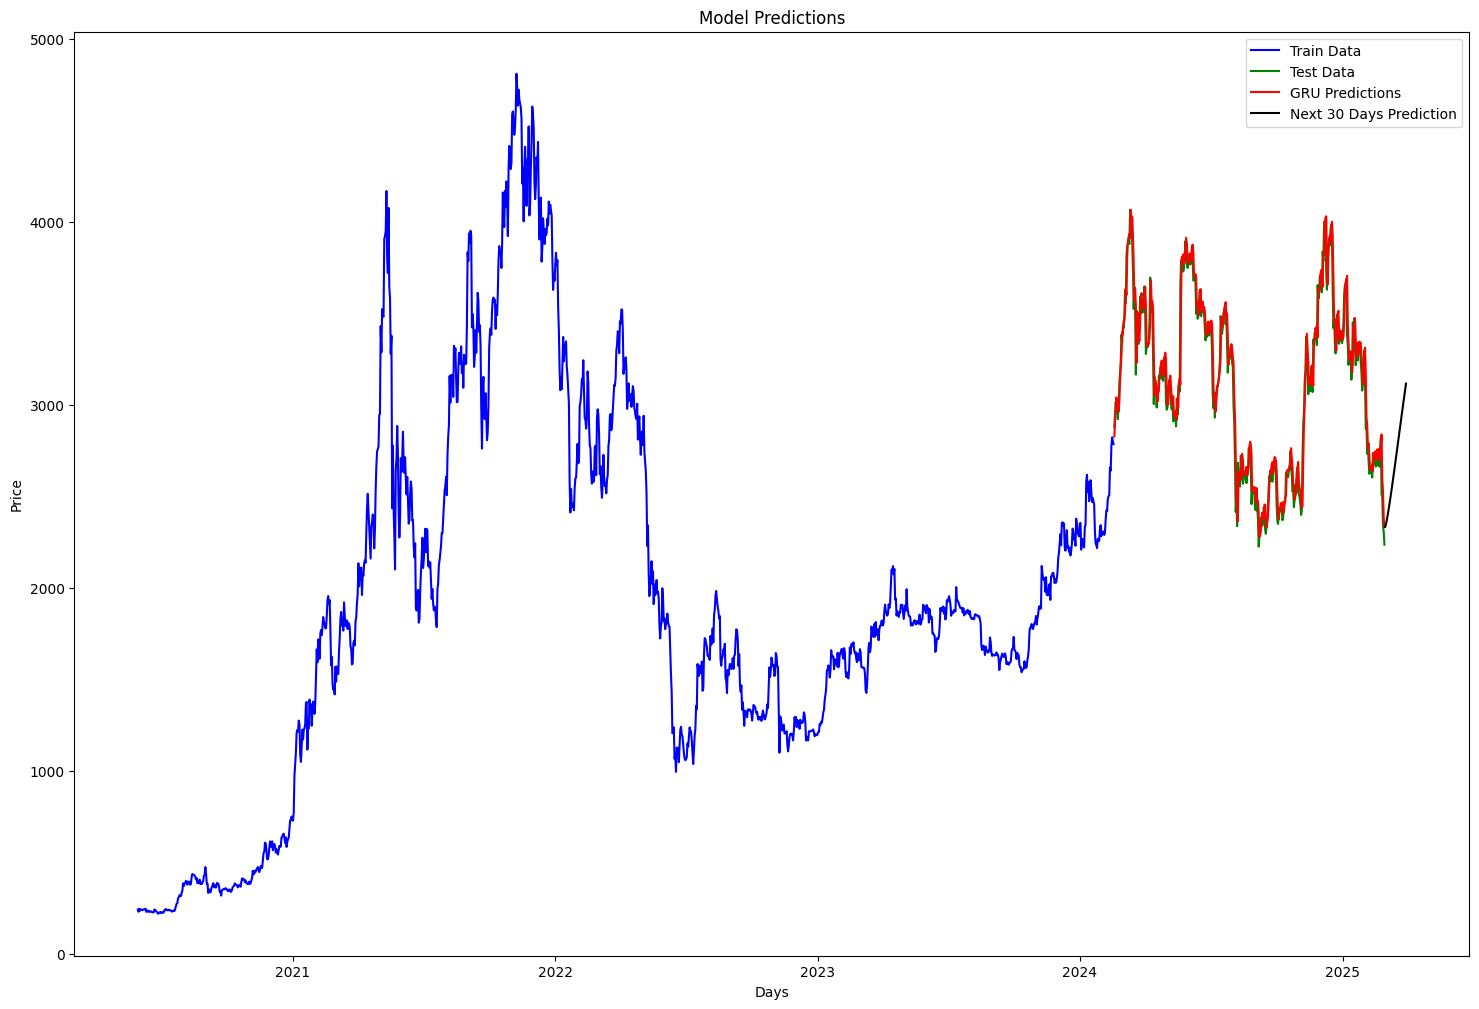

In [104]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_82.index[150:], train_data_ETH_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_82.index, test_data_ETH_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_82.index[0:], y_GRU_O_ETHcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_ETHCoin_82 = pd.date_range(test_data_ETH_82.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_ETHCoin_82, predicted_prices_ETHcoin_82, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin82_predictions_30days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 60 ngày tiếp theo

In [105]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_ETHcoin_60days_82 = X_test_ETHcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_ETHcoin_60days_82 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_ETHcoin_60days_82 = regressorGRU_ETHcoin_82.predict(last_input_ETHcoin_60days_82.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_ETHcoin_60days_82.append(next_pred_ETHcoin_60days_82[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_ETHcoin_60days_82 = np.append(last_input_ETHcoin_60days_82[1:], next_pred_ETHcoin_60days_82)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_ETHcoin_60days_82 = scaler.inverse_transform(np.array(predicted_prices_ETHcoin_60days_82).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━

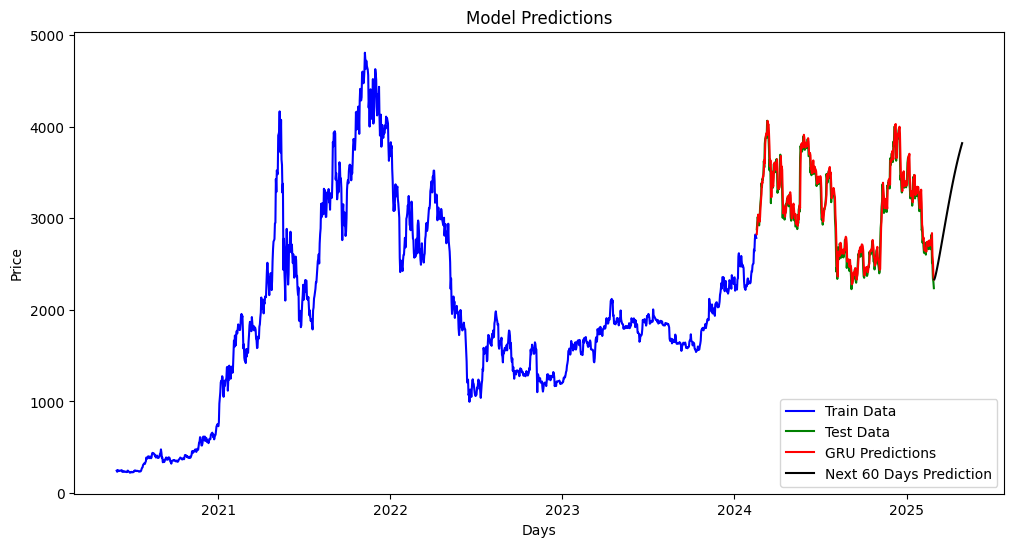

In [106]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 60 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_82.index[150:], train_data_ETH_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_82.index, test_data_ETH_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_82.index[0:], y_GRU_O_ETHcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 60 ngày tiếp theo
next_60_days_ETHcoin_82 = pd.date_range(test_data_ETH_82.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_ETHcoin_82, predicted_prices_ETHcoin_60days_82, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin82_predictions_60days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 90 ngày tiếp theo

In [107]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_ETHcoin_90days_82 = X_test_ETHcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_ETHcoin_90days_82 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_ETHcoin_90days_82 = regressorGRU_ETHcoin_82.predict(last_input_ETHcoin_90days_82.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_ETHcoin_90days_82.append(next_pred_ETHcoin_90days_82[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_ETHcoin_90days_82 = np.append(last_input_ETHcoin_90days_82[1:], next_pred_ETHcoin_90days_82)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_ETHcoin_90days_82 = scaler.inverse_transform(np.array(predicted_prices_ETHcoin_90days_82).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

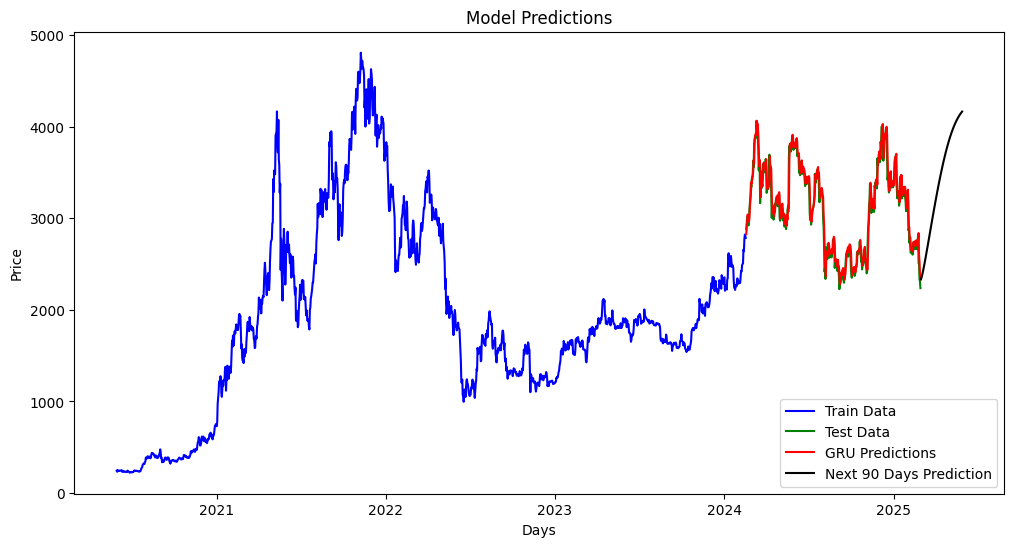

In [108]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 90 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_82.index[150:], train_data_ETH_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_82.index, test_data_ETH_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_82.index[0:], y_GRU_O_ETHcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 90 ngày tiếp theo
next_90_days_ETHcoin_82 = pd.date_range(test_data_ETH_82.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_ETHcoin_82, predicted_prices_ETHcoin_90days_82, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin82_predictions_90days.png", dpi=300, bbox_inches="tight")
plt.show()

### Biểu đồ dự đoán từ mô hình GRU

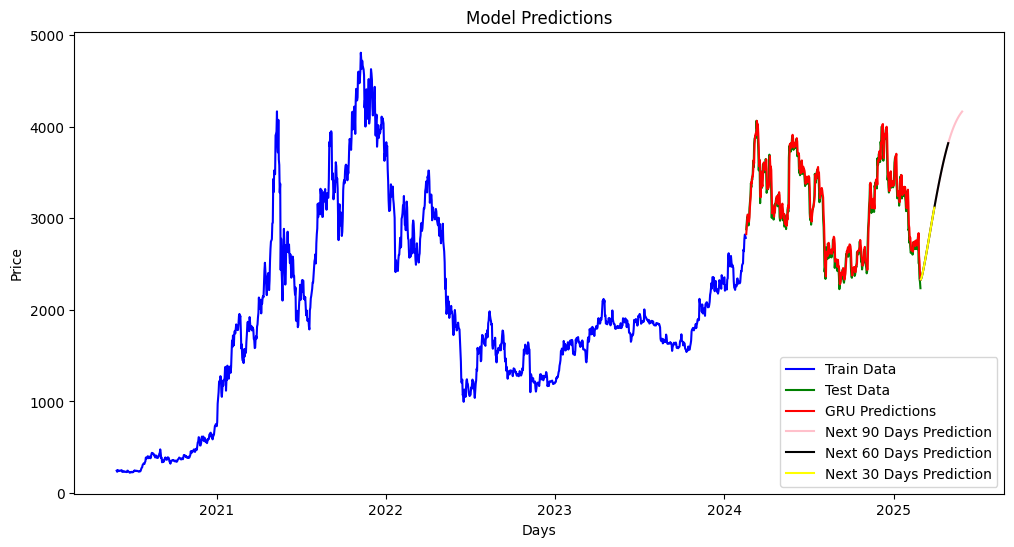

In [109]:
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_82.index[150:], train_data_ETH_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_82.index, test_data_ETH_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_82.index[0:], y_GRU_O_ETHcoin_82, label="GRU Predictions", color="red")

plt.plot(next_90_days_ETHcoin_82, predicted_prices_ETHcoin_90days_82, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_ETHcoin_82, predicted_prices_ETHcoin_60days_82, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_ETHCoin_82, predicted_prices_ETHcoin_82, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin82_predictions.png", dpi=300, bbox_inches="tight")
plt.show()

### Đánh giá mô hình

In [110]:
actual_prices_ETHcoin_82 = test_data_ETH_82.Price.values
actual_prices_ETHcoin_82 = np.reshape(actual_prices_ETHcoin_82, (-1, 1))

mape_ETHcoin_82 = calculate_mape(actual_prices_ETHcoin_82, y_GRU_O_ETHcoin_82)
mse_ETHcoin_82 = calculate_mse(actual_prices_ETHcoin_82, y_GRU_O_ETHcoin_82)
rmse_ETHcoin_82 = calculate_rmse(actual_prices_ETHcoin_82, y_GRU_O_ETHcoin_82)

print("MAPE: ", mape_ETHcoin_82)
print("MSE: ", mse_ETHcoin_82)
print("RMSE: ", rmse_ETHcoin_82)

MAPE:  2.6112670729745044
MSE:  12367.803984795055
RMSE:  111.21062892005897


## Chia 7:3

In [111]:
# Setting 70 percent data for training
training_data_len_ETHcoin_73 = math.ceil(len(ETHCoin) * .7)

# Splitting the dataset
train_data_ETH_73 = ETHCoin[:training_data_len_ETHcoin_73]
test_data_ETH_73 = ETHCoin[training_data_len_ETHcoin_73:]

In [112]:
# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_ETHcoin_73 = scaled_ETHcoin[:training_data_len_ETHcoin_73]
scaled_test_ETHcoin_73 = scaled_ETHcoin[training_data_len_ETHcoin_73:]

In [113]:
X_train_ETHcoin_73 = []
y_train_ETHcoin_73 = []
for i in range(50, len(scaled_train_ETHcoin_73)):
    X_train_ETHcoin_73.append(scaled_train_ETHcoin_73[i-50:i, 0])
    y_train_ETHcoin_73.append(scaled_train_ETHcoin_73[i, 0])

In [114]:
last_50_days_train_ETHcoin_73 = scaled_train_ETHcoin_73[-50:]
full_test_input_ETHcoin_73 = np.concatenate((last_50_days_train_ETHcoin_73, scaled_test_ETHcoin_73), axis=0)
X_test_ETHcoin_73 = []
for i in range(50, len(full_test_input_ETHcoin_73)):
    X_test_ETHcoin_73.append(full_test_input_ETHcoin_73[i-50:i, 0])

In [115]:
# The data is converted to Numpy array
X_train_ETHcoin_73, y_train_ETHcoin_73 = np.array(X_train_ETHcoin_73), np.array(y_train_ETHcoin_73)

# Reshaping
X_train_ETHcoin_73 = np.reshape(X_train_ETHcoin_73, (X_train_ETHcoin_73.shape[0], X_train_ETHcoin_73.shape[1], 1))

# The data is converted to numpy array
X_test_ETHcoin_73 = np.array(X_test_ETHcoin_73)

# Reshaping
X_test_ETHcoin_73 = np.reshape(X_test_ETHcoin_73, (X_test_ETHcoin_73.shape[0], X_test_ETHcoin_73.shape[1], 1))

In [116]:
# Huấn luyện mô hình
regressorGRU_ETHcoin_73 = Sequential()
regressorGRU_ETHcoin_73.add(GRU(50, return_sequences=False, input_shape=(X_train_ETHcoin_73.shape[1], 1)))
regressorGRU_ETHcoin_73.add(Dense(1))

# Compile the regressorGRU_ETHcoin_73
regressorGRU_ETHcoin_73.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_ETHcoin_73.fit(X_train_ETHcoin_73, y_train_ETHcoin_73, epochs=100, batch_size=64, validation_split=0.3)
y_GRU_ETHcoin_73 = regressorGRU_ETHcoin_73.predict(X_test_ETHcoin_73)
y_GRU_O_ETHcoin_73 = scaler.inverse_transform(y_GRU_ETHcoin_73)
last_input_ETHcoin_73 = X_test_ETHcoin_73[-1]

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.2328 - val_loss: 0.0027
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0320 - val_loss: 0.0187
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0209 - val_loss: 0.0012
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0092 - val_loss: 8.2662e-04
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0033 - val_loss: 3.2304e-04
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0014 - val_loss: 4.3859e-04
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0013 - val_loss: 3.7349e-04
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0013 - val_loss: 2.6859e-04
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0011 - val_loss: 2.8985e-04
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0012 - val_loss: 2.5896e-04
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0011 - val_loss: 2.4852e-04
Epoch 12/100
14/14 ━━━━━━━━━━━━━

### Dự đoán 30 ngày

In [117]:
# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_ETHcoin_73 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_ETHcoin_73 = regressorGRU_ETHcoin_73.predict(last_input_ETHcoin_73.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_ETHcoin_73.append(next_pred_ETHcoin_73[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_ETHcoin_73 = np.append(last_input_ETHcoin_73[1:], next_pred_ETHcoin_73)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_ETHcoin_73 = scaler.inverse_transform(np.array(predicted_prices_ETHcoin_73).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

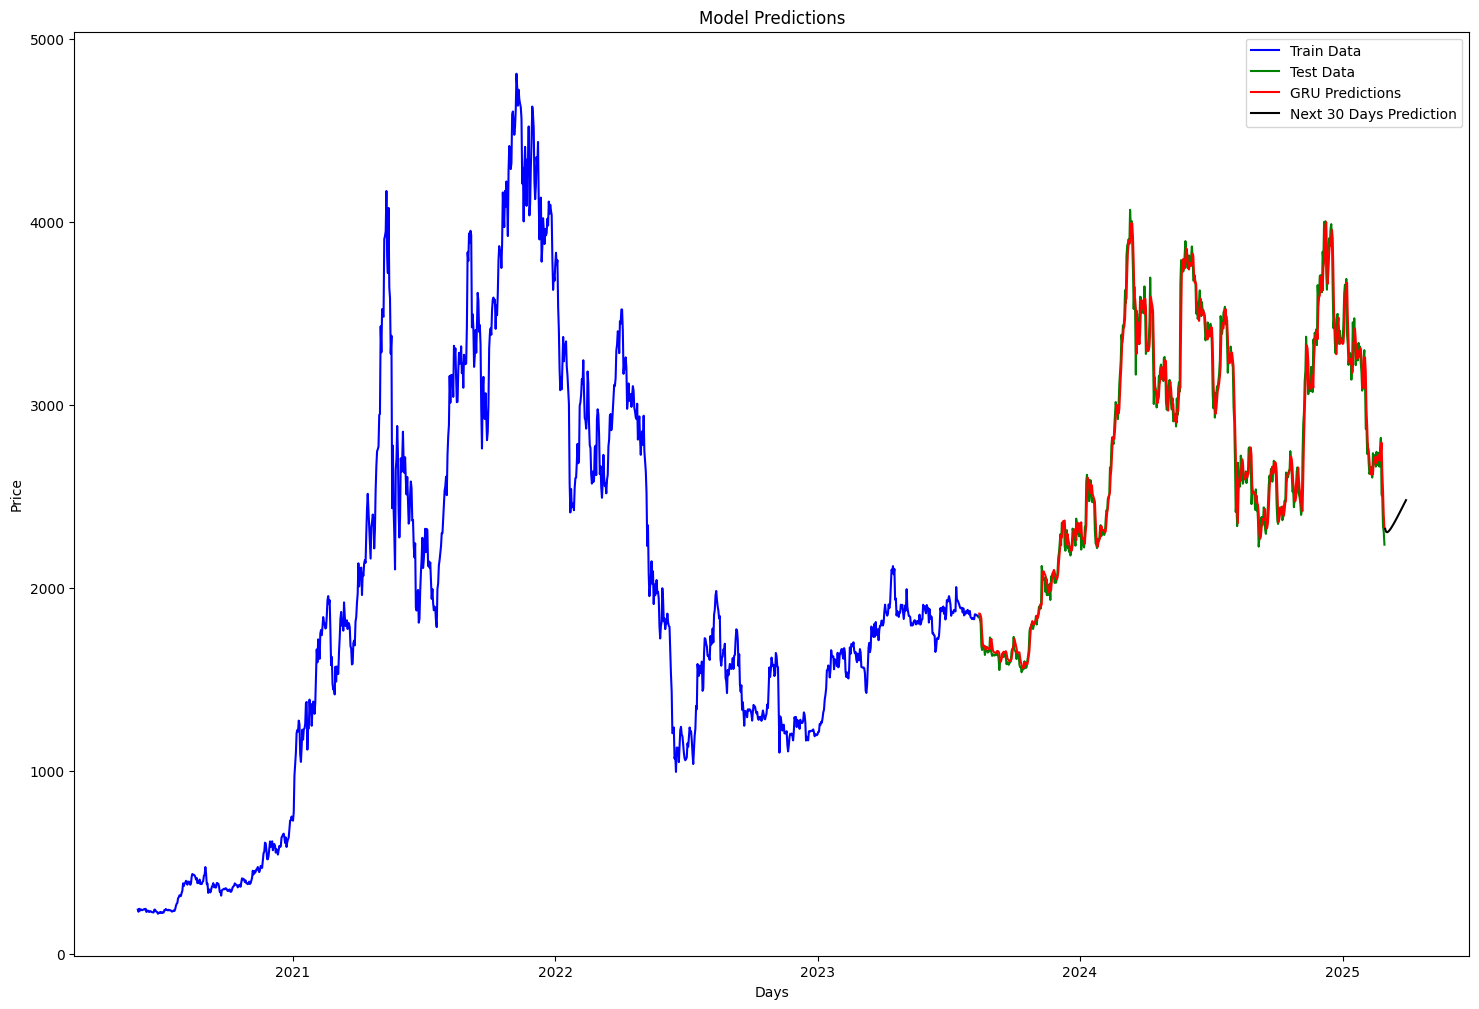

In [118]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_73.index[150:], train_data_ETH_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_73.index, test_data_ETH_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_73.index[0:], y_GRU_O_ETHcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_ETHCoin_73 = pd.date_range(test_data_ETH_73.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_ETHCoin_73, predicted_prices_ETHcoin_73, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin73_predictions_30days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 60 ngày

In [119]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_ETHcoin_60days_73 = X_test_ETHcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_ETHcoin_60days_73 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_ETHcoin_60days_73 = regressorGRU_ETHcoin_73.predict(last_input_ETHcoin_60days_73.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_ETHcoin_60days_73.append(next_pred_ETHcoin_60days_73[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_ETHcoin_60days_73 = np.append(last_input_ETHcoin_60days_73[1:], next_pred_ETHcoin_60days_73)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_ETHcoin_60days_73 = scaler.inverse_transform(np.array(predicted_prices_ETHcoin_60days_73).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

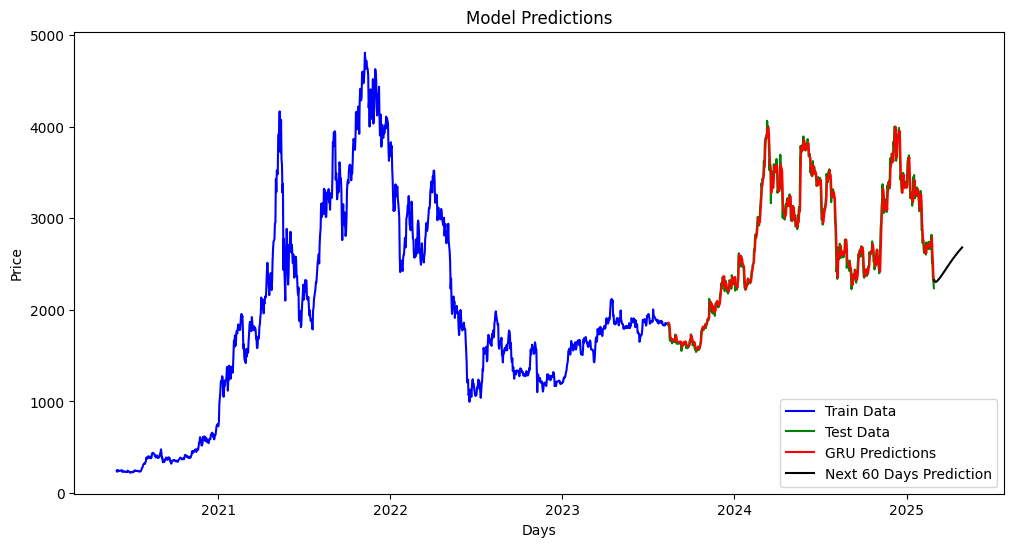

In [120]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 60 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_73.index[150:], train_data_ETH_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_73.index, test_data_ETH_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_73.index[0:], y_GRU_O_ETHcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 60 ngày tiếp theo
next_60_days_ETHcoin_73 = pd.date_range(test_data_ETH_73.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_ETHcoin_73, predicted_prices_ETHcoin_60days_73, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin73_predictions_60days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 90 ngày

In [121]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_ETHcoin_90days_73 = X_test_ETHcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_ETHcoin_90days_73 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_ETHcoin_90days_73 = regressorGRU_ETHcoin_73.predict(last_input_ETHcoin_90days_73.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_ETHcoin_90days_73.append(next_pred_ETHcoin_90days_73[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_ETHcoin_90days_73 = np.append(last_input_ETHcoin_90days_73[1:], next_pred_ETHcoin_90days_73)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_ETHcoin_90days_73 = scaler.inverse_transform(np.array(predicted_prices_ETHcoin_90days_73).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

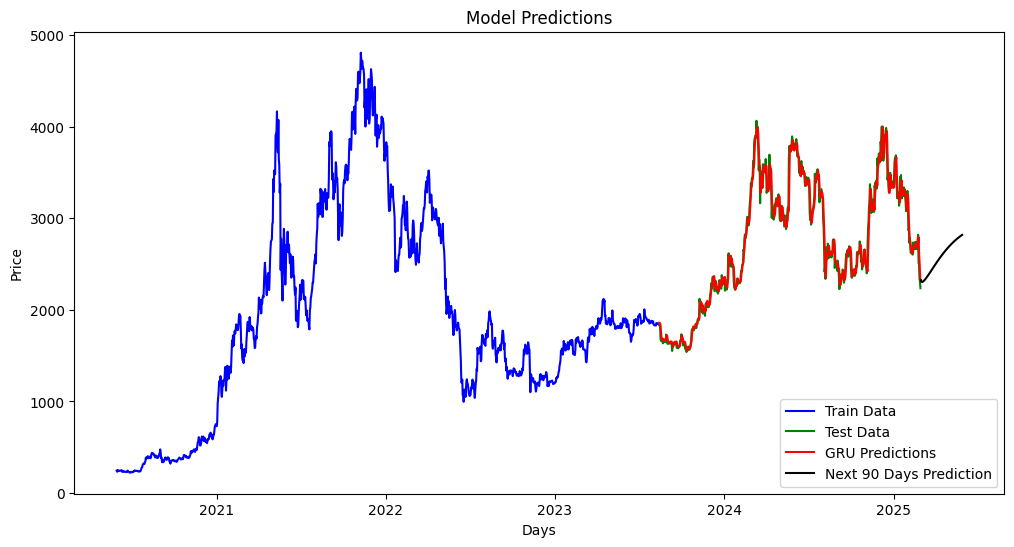

In [122]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 90 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_73.index[150:], train_data_ETH_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_73.index, test_data_ETH_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_73.index[0:], y_GRU_O_ETHcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 90 ngày tiếp theo
next_90_days_ETHcoin_73 = pd.date_range(test_data_ETH_73.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_ETHcoin_73, predicted_prices_ETHcoin_90days_73, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin73_predictions_90days.png", dpi=300, bbox_inches="tight")
plt.show()

### Biểu đồ dự đoán từ mô hình GRU

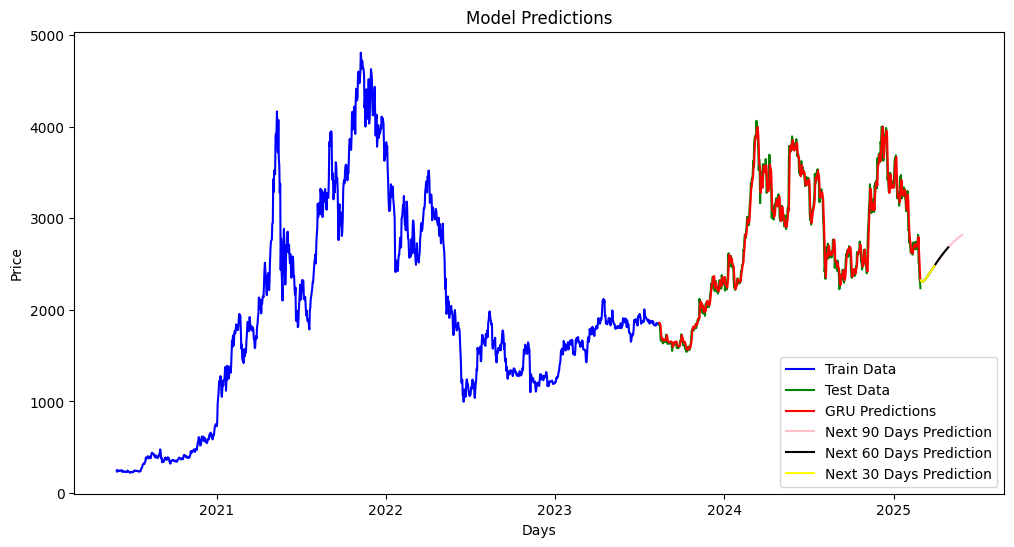

In [123]:
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_73.index[150:], train_data_ETH_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_73.index, test_data_ETH_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_73.index[0:], y_GRU_O_ETHcoin_73, label="GRU Predictions", color="red")

plt.plot(next_90_days_ETHcoin_73, predicted_prices_ETHcoin_90days_73, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_ETHcoin_73, predicted_prices_ETHcoin_60days_73, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_ETHCoin_73, predicted_prices_ETHcoin_73, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin73_predictions.png", dpi=300, bbox_inches="tight")
plt.show()

### Đánh giá mô hình

In [124]:
actual_prices_ETHcoin_73 = test_data_ETH_73.Price.values
actual_prices_ETHcoin_73 = np.reshape(actual_prices_ETHcoin_73, (-1, 1))

mape_ETHcoin_73 = calculate_mape(actual_prices_ETHcoin_73, y_GRU_O_ETHcoin_73)
mse_ETHcoin_73 = calculate_mse(actual_prices_ETHcoin_73, y_GRU_O_ETHcoin_73)
rmse_ETHcoin_73 = calculate_rmse(actual_prices_ETHcoin_73, y_GRU_O_ETHcoin_73)

print("MAPE: ", mape_ETHcoin_73)
print("MSE: ", mse_ETHcoin_73)
print("RMSE: ", rmse_ETHcoin_73)

MAPE:  2.457243298744953
MSE:  9777.314739154608
RMSE:  98.88030511256834


## Chia 9:1

In [125]:
# Setting 90 percent data for training
training_data_len_ETHcoin_91 = math.ceil(len(ETHCoin) * .9)

# Splitting the dataset
train_data_ETH_91 = ETHCoin[:training_data_len_ETHcoin_91]
test_data_ETH_91 = ETHCoin[training_data_len_ETHcoin_91:]

In [126]:
# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_ETHcoin_91 = scaled_ETHcoin[:training_data_len_ETHcoin_91]
scaled_test_ETHcoin_91 = scaled_ETHcoin[training_data_len_ETHcoin_91:]

In [127]:
X_train_ETHcoin_91 = []
y_train_ETHcoin_91 = []
for i in range(50, len(scaled_train_ETHcoin_91)):
    X_train_ETHcoin_91.append(scaled_train_ETHcoin_91[i-50:i, 0])
    y_train_ETHcoin_91.append(scaled_train_ETHcoin_91[i, 0])

In [128]:
last_50_days_train_ETHcoin_91 = scaled_train_ETHcoin_91[-50:]
full_test_input_ETHcoin_91 = np.concatenate((last_50_days_train_ETHcoin_91, scaled_test_ETHcoin_91), axis=0)
X_test_ETHcoin_91 = []
for i in range(50, len(full_test_input_ETHcoin_91)):
    X_test_ETHcoin_91.append(full_test_input_ETHcoin_91[i-50:i, 0])

In [129]:
# The data is converted to Numpy array
X_train_ETHcoin_91, y_train_ETHcoin_91 = np.array(X_train_ETHcoin_91), np.array(y_train_ETHcoin_91)

# Reshaping
X_train_ETHcoin_91 = np.reshape(X_train_ETHcoin_91, (X_train_ETHcoin_91.shape[0], X_train_ETHcoin_91.shape[1], 1))

# The data is converted to numpy array
X_test_ETHcoin_91 = np.array(X_test_ETHcoin_91)

# Reshaping
X_test_ETHcoin_91 = np.reshape(X_test_ETHcoin_91, (X_test_ETHcoin_91.shape[0], X_test_ETHcoin_91.shape[1], 1))

In [130]:
# Huấn luyện mô hình
regressorGRU_ETHcoin_91 = Sequential()
regressorGRU_ETHcoin_91.add(GRU(50, return_sequences=False, input_shape=(X_train_ETHcoin_91.shape[1], 1)))
regressorGRU_ETHcoin_91.add(Dense(1))

# Compile the regressorGRU_ETHcoin_91
regressorGRU_ETHcoin_91.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_ETHcoin_91.fit(X_train_ETHcoin_91, y_train_ETHcoin_91, epochs=100, batch_size=64, validation_split=0.1)
y_GRU_ETHcoin_91 = regressorGRU_ETHcoin_91.predict(X_test_ETHcoin_91)
y_GRU_O_ETHcoin_91 = scaler.inverse_transform(y_GRU_ETHcoin_91)
last_input_ETHcoin_91 = X_test_ETHcoin_91[-1]

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0859 - val_loss: 0.0016
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0109 - val_loss: 0.0056
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 8.1429e-04 - val_loss: 0.0012
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 8.0725e-04 - val_loss: 0.0011
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 6.3212e-04 - val_loss: 0.0012
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 6.8120e-04 - val_loss: 0.0011
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 6.6670e-04 - val_loss: 0.0010
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 5.9860e-04 - val_loss: 9.7063e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 6.1393e-04 - val_loss: 9.7334e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 6.3838e-04 - val_loss: 9.1678e-04
Epoch 12/100
24/24 ━

### Dự đoán 30 ngày

In [131]:
# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_ETHcoin_91 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_ETHcoin_91 = regressorGRU_ETHcoin_91.predict(last_input_ETHcoin_91.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_ETHcoin_91.append(next_pred_ETHcoin_91[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_ETHcoin_91 = np.append(last_input_ETHcoin_91[1:], next_pred_ETHcoin_91)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_ETHcoin_91 = scaler.inverse_transform(np.array(predicted_prices_ETHcoin_91).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

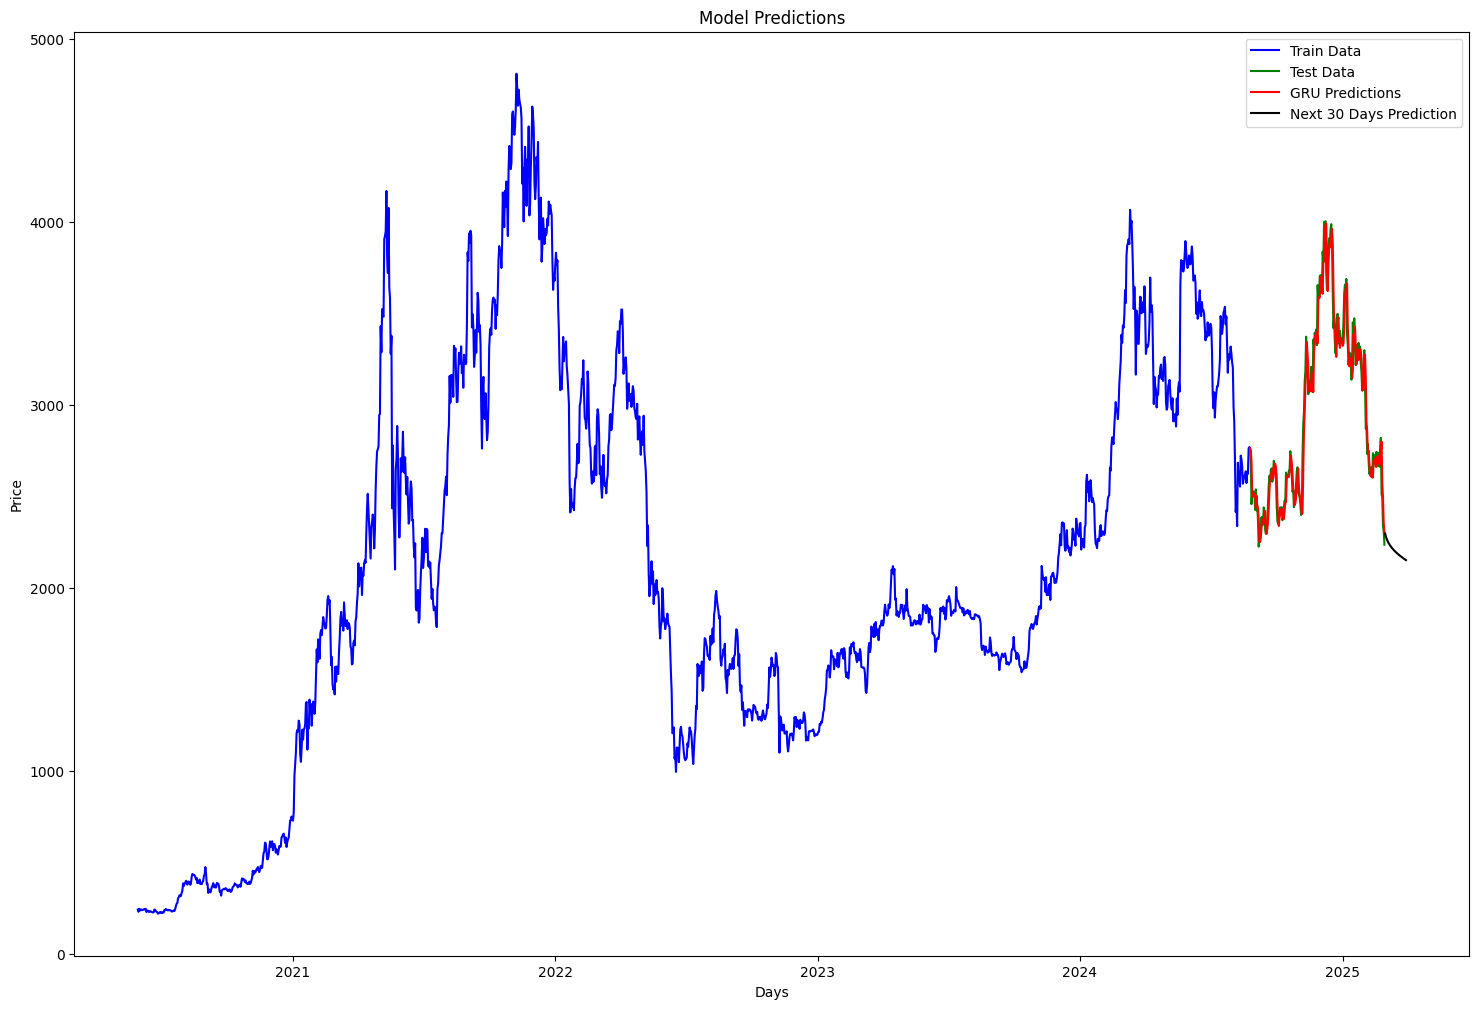

In [132]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_91.index[150:], train_data_ETH_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_91.index, test_data_ETH_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_91.index[0:], y_GRU_O_ETHcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_ETHCoin_91 = pd.date_range(test_data_ETH_91.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_ETHCoin_91, predicted_prices_ETHcoin_91, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin91_predictions_30days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 60 ngày

In [133]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_ETHcoin_60days_91 = X_test_ETHcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_ETHcoin_60days_91 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_ETHcoin_60days_91 = regressorGRU_ETHcoin_91.predict(last_input_ETHcoin_60days_91.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_ETHcoin_60days_91.append(next_pred_ETHcoin_60days_91[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_ETHcoin_60days_91 = np.append(last_input_ETHcoin_60days_91[1:], next_pred_ETHcoin_60days_91)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_ETHcoin_60days_91 = scaler.inverse_transform(np.array(predicted_prices_ETHcoin_60days_91).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

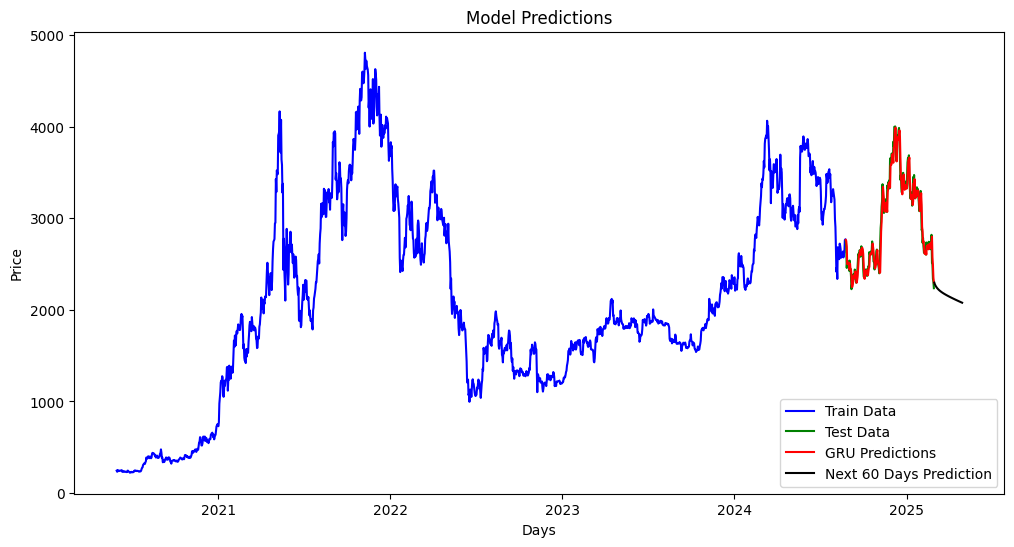

In [134]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 60 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_91.index[150:], train_data_ETH_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_91.index, test_data_ETH_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_91.index[0:], y_GRU_O_ETHcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 60 ngày tiếp theo
next_60_days_ETHcoin_91 = pd.date_range(test_data_ETH_91.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_ETHcoin_91, predicted_prices_ETHcoin_60days_91, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin91_predictions_60days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 90 ngày

In [135]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_ETHcoin_90days_91 = X_test_ETHcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_ETHcoin_90days_91 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_ETHcoin_90days_91 = regressorGRU_ETHcoin_91.predict(last_input_ETHcoin_90days_91.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_ETHcoin_90days_91.append(next_pred_ETHcoin_90days_91[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_ETHcoin_90days_91 = np.append(last_input_ETHcoin_90days_91[1:], next_pred_ETHcoin_90days_91)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_ETHcoin_90days_91 = scaler.inverse_transform(np.array(predicted_prices_ETHcoin_90days_91).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

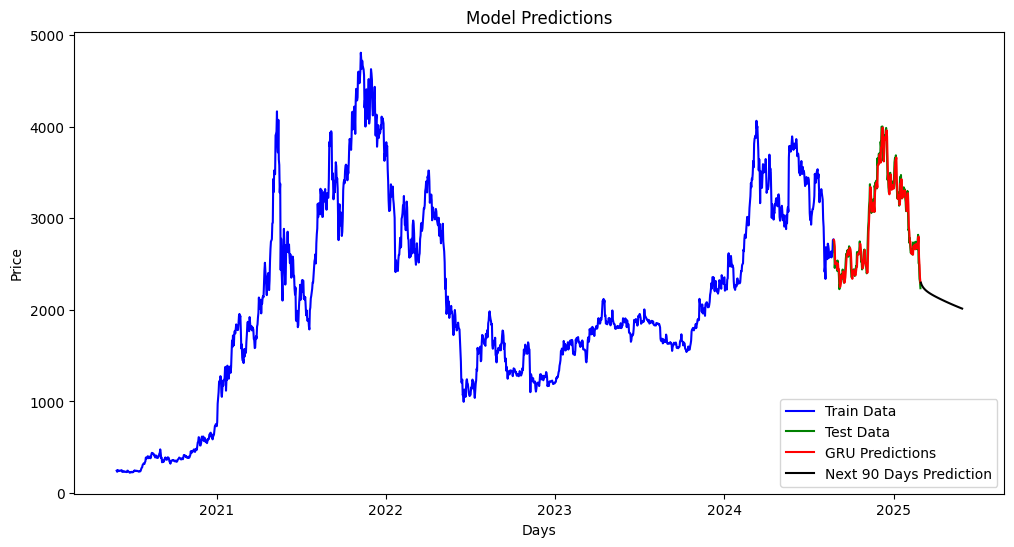

In [136]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 90 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_91.index[150:], train_data_ETH_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_91.index, test_data_ETH_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_91.index[0:], y_GRU_O_ETHcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 90 ngày tiếp theo
next_90_days_ETHcoin_91 = pd.date_range(test_data_ETH_91.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_ETHcoin_91, predicted_prices_ETHcoin_90days_91, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin91_predictions_90days.png", dpi=300, bbox_inches="tight")
plt.show()

### Biểu đồ dự đoán từ mô hình GRU

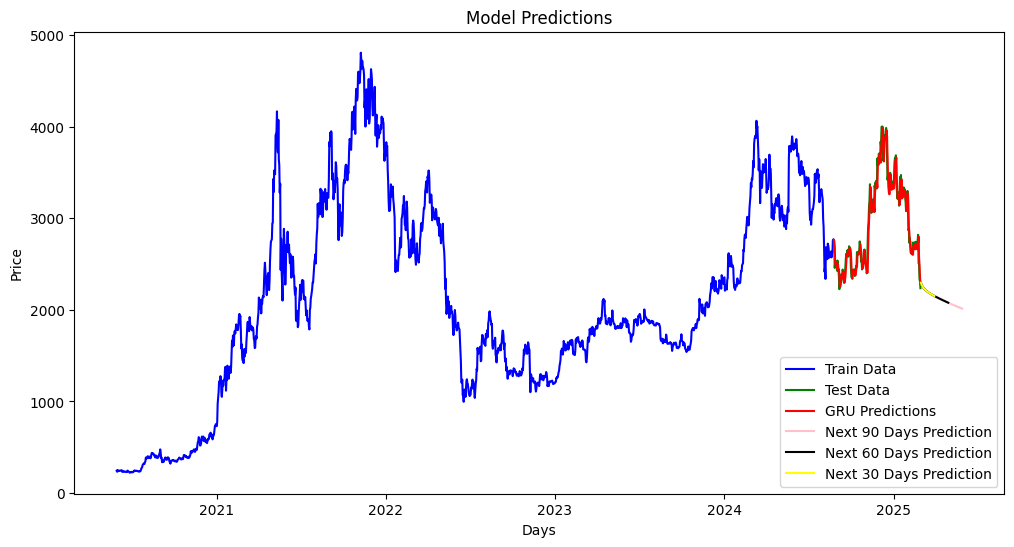

In [137]:
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_ETH_91.index[150:], train_data_ETH_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_ETH_91.index, test_data_ETH_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_ETH_91.index[0:], y_GRU_O_ETHcoin_91, label="GRU Predictions", color="red")

plt.plot(next_90_days_ETHcoin_91, predicted_prices_ETHcoin_90days_91, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_ETHcoin_91, predicted_prices_ETHcoin_60days_91, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_ETHCoin_91, predicted_prices_ETHcoin_91, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("ETHcoin91_predictions.png", dpi=300, bbox_inches="tight")
plt.show()

### Đánh giá mô hình

In [138]:
actual_prices_ETHcoin_91 = test_data_ETH_91.Price.values
actual_prices_ETHcoin_91 = np.reshape(actual_prices_ETHcoin_91, (-1, 1))

mape_ETHcoin_91 = calculate_mape(actual_prices_ETHcoin_91, y_GRU_O_ETHcoin_91)
mse_ETHcoin_91 = calculate_mse(actual_prices_ETHcoin_91, y_GRU_O_ETHcoin_91)
rmse_ETHcoin_91 = calculate_rmse(actual_prices_ETHcoin_91, y_GRU_O_ETHcoin_91)

print("MAPE: ", mape_ETHcoin_91)
print("MSE: ", mse_ETHcoin_91)
print("RMSE: ", rmse_ETHcoin_91)

MAPE:  2.6481310712256514
MSE:  11050.459367408688
RMSE:  105.12116517337833


# XRP Coin

In [5]:
# XRP Coin
XRPCoin = pd.read_csv('XRP Historical Data.csv')

In [6]:
# Chuyển đổi cột Price sang kiểu số, loại bỏ dấu phẩy nếu có
XRPCoin['Price'] = XRPCoin['Price'].astype(str).str.replace(',', '').astype(float)

# Chuyển đổi cột 'Date' sang định dạng ngày tháng
XRPCoin['Date'] = pd.to_datetime(XRPCoin['Date'])

# Đặt cột 'Date' làm chỉ số
XRPCoin.set_index('Date', inplace=True)
XRPCoin.sort_values('Date', inplace=True)

Scaler data

In [7]:
# Chọn giá trị Price
dataset_XRPcoin = XRPCoin.Price.values
# Reshaping 1D to 2D array
dataset_XRPcoin = np.reshape(dataset_XRPcoin, (-1,1))

In [8]:
# Đánh dấu sửa đổi: Sử dụng scaler.fit_transform cho toàn bộ dữ liệu
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_XRPcoin = scaler.fit_transform(dataset_XRPcoin)

## Chia 8:2

In [9]:
# Chọn 80% dữ liệu cho training
training_data_len_XRPcoin_82 = math.ceil(len(XRPCoin) * .8)

# Splitting the dataset
train_data_XRP_82 = XRPCoin[:training_data_len_XRPcoin_82]
test_data_XRP_82 = XRPCoin[training_data_len_XRPcoin_82:]

In [10]:
# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_XRPcoin_82 = scaled_XRPcoin[:training_data_len_XRPcoin_82]
scaled_test_XRPcoin_82 = scaled_XRPcoin[training_data_len_XRPcoin_82:]

In [11]:
# Chuẩn bị dữ liệu huấn luyện
X_train_XRPcoin_82 = []
y_train_XRPcoin_82 = []
for i in range(50, len(scaled_train_XRPcoin_82)):
    X_train_XRPcoin_82.append(scaled_train_XRPcoin_82[i-50:i, 0])
    y_train_XRPcoin_82.append(scaled_train_XRPcoin_82[i, 0])

In [12]:
# Chuẩn bị dữ liệu kiểm tra
last_50_days_train_XRPcoin_82 = scaled_train_XRPcoin_82[-50:]
full_test_input_XRPcoin_82 = np.concatenate((last_50_days_train_XRPcoin_82, scaled_test_XRPcoin_82), axis=0)
X_test_XRPcoin_82 = []
for i in range(50, len(full_test_input_XRPcoin_82)):
    X_test_XRPcoin_82.append(full_test_input_XRPcoin_82[i-50:i, 0])

In [13]:
# Chuyển đổi tập train thành mảng Numpy
X_train_XRPcoin_82, y_train_XRPcoin_82 = np.array(X_train_XRPcoin_82), np.array(y_train_XRPcoin_82)

# Reshape dữ liệu tập train
X_train_XRPcoin_82 = np.reshape(X_train_XRPcoin_82, (X_train_XRPcoin_82.shape[0], X_train_XRPcoin_82.shape[1], 1))

# Chuyển đổi tập test thành mảng Numpy
X_test_XRPcoin_82 = np.array(X_test_XRPcoin_82)

# Reshape dữ liệu tập test
X_test_XRPcoin_82 = np.reshape(X_test_XRPcoin_82, (X_test_XRPcoin_82.shape[0], X_test_XRPcoin_82.shape[1], 1))

In [14]:
# Huấn luyện mô hình
regressorGRU_XRPcoin_82 = Sequential()
regressorGRU_XRPcoin_82.add(GRU(50, return_sequences=False, input_shape=(X_train_XRPcoin_82.shape[1], 1)))
regressorGRU_XRPcoin_82.add(Dense(1))

# Compile the regressorGRU_XRPcoin_82
regressorGRU_XRPcoin_82.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_XRPcoin_82.fit(X_train_XRPcoin_82, y_train_XRPcoin_82, epochs=100, batch_size=64, validation_split=0.2)
y_GRU_XRPcoin_82 = regressorGRU_XRPcoin_82.predict(X_test_XRPcoin_82)
y_GRU_O_XRPcoin_82 = scaler.inverse_transform(y_GRU_XRPcoin_82)

# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu cho dự đoán tiếp theo
last_input_XRPcoin_82 = X_test_XRPcoin_82[-1]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0167 - val_loss: 0.0013
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0039 - val_loss: 1.5609e-04
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 9.2889e-04 - val_loss: 1.4484e-04
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 5.1293e-04 - val_loss: 1.1784e-04
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4.4084e-04 - val_loss: 1.1366e-04
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4.2983e-04 - val_loss: 1.2563e-04
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 4.7816e-04 - val_loss: 1.1196e-04
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 3.5840e-04 - val_loss: 1.1155e-04
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 4.3752e-04 - val_loss: 1.0692e-04
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 3.0351e-04 - val_loss: 1.0156e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 3.8943e-04

### Dự đoán 30 ngày tiếp theo

In [15]:
# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_XRPcoin_82 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_XRPcoin_82 = regressorGRU_XRPcoin_82.predict(last_input_XRPcoin_82.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_XRPcoin_82.append(next_pred_XRPcoin_82[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_XRPcoin_82 = np.append(last_input_XRPcoin_82[1:], next_pred_XRPcoin_82)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_XRPcoin_82 = scaler.inverse_transform(np.array(predicted_prices_XRPcoin_82).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

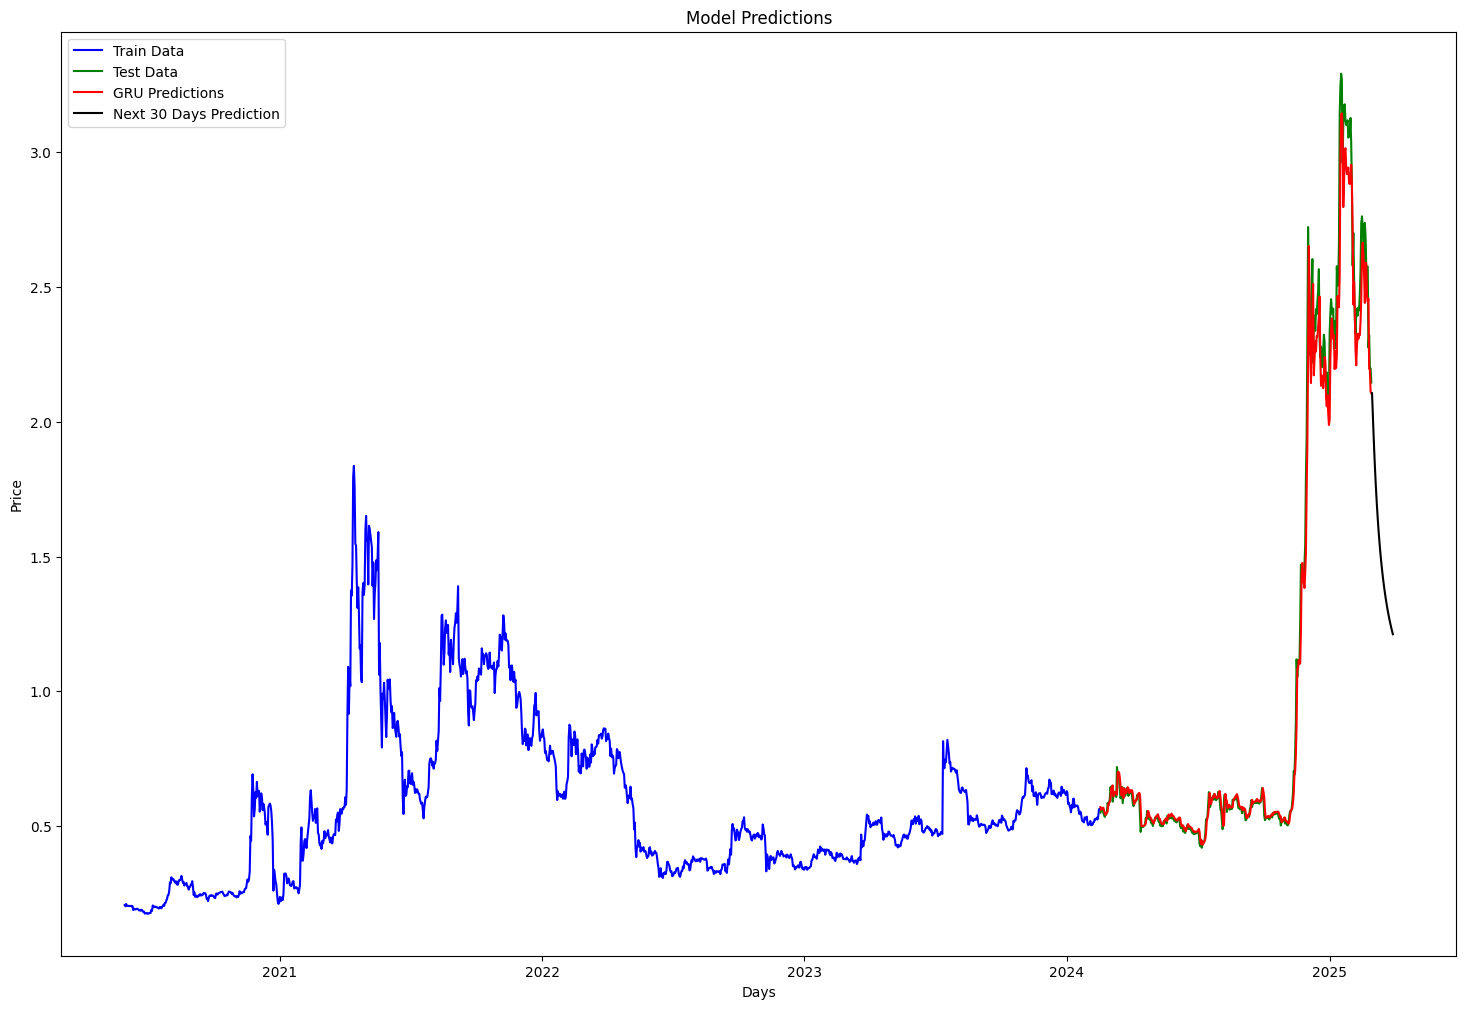

In [16]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_82.index[150:], train_data_XRP_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_82.index, test_data_XRP_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_82.index[0:], y_GRU_O_XRPcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_XRPCoin_82 = pd.date_range(test_data_XRP_82.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_XRPCoin_82, predicted_prices_XRPcoin_82, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin82_predictions_30days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 60 ngày tiếp theo

In [17]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_XRPcoin_60days_82 = X_test_XRPcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_XRPcoin_60days_82 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_XRPcoin_60days_82 = regressorGRU_XRPcoin_82.predict(last_input_XRPcoin_60days_82.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_XRPcoin_60days_82.append(next_pred_XRPcoin_60days_82[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_XRPcoin_60days_82 = np.append(last_input_XRPcoin_60days_82[1:], next_pred_XRPcoin_60days_82)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_XRPcoin_60days_82 = scaler.inverse_transform(np.array(predicted_prices_XRPcoin_60days_82).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━

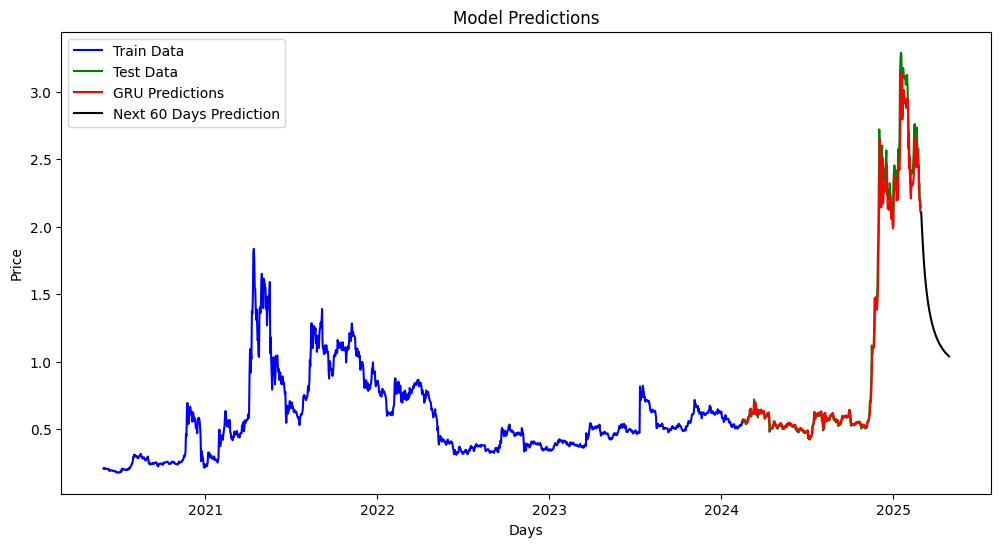

In [18]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 60 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_82.index[150:], train_data_XRP_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_82.index, test_data_XRP_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_82.index[0:], y_GRU_O_XRPcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 60 ngày tiếp theo
next_60_days_XRPcoin_82 = pd.date_range(test_data_XRP_82.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_XRPcoin_82, predicted_prices_XRPcoin_60days_82, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin82_predictions_60days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 90 ngày tiếp theo

In [19]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_XRPcoin_90days_82 = X_test_XRPcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_XRPcoin_90days_82 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_XRPcoin_90days_82 = regressorGRU_XRPcoin_82.predict(last_input_XRPcoin_90days_82.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_XRPcoin_90days_82.append(next_pred_XRPcoin_90days_82[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_XRPcoin_90days_82 = np.append(last_input_XRPcoin_90days_82[1:], next_pred_XRPcoin_90days_82)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_XRPcoin_90days_82 = scaler.inverse_transform(np.array(predicted_prices_XRPcoin_90days_82).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

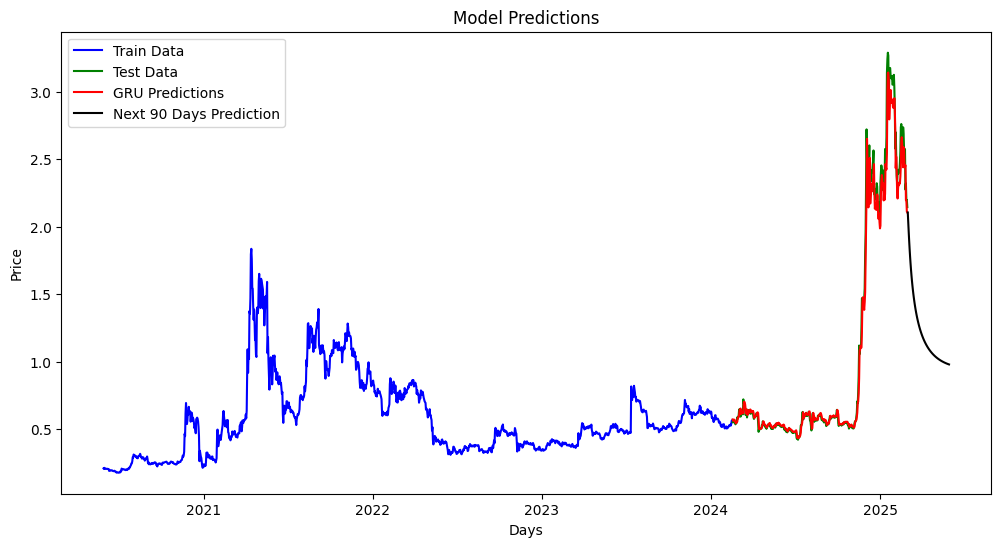

In [20]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 90 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_82.index[150:], train_data_XRP_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_82.index, test_data_XRP_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_82.index[0:], y_GRU_O_XRPcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 90 ngày tiếp theo
next_90_days_XRPcoin_82 = pd.date_range(test_data_XRP_82.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_XRPcoin_82, predicted_prices_XRPcoin_90days_82, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin82_predictions_90days.png", dpi=300, bbox_inches="tight")
plt.show()

### Biểu đồ dự đoán từ mô hình GRU

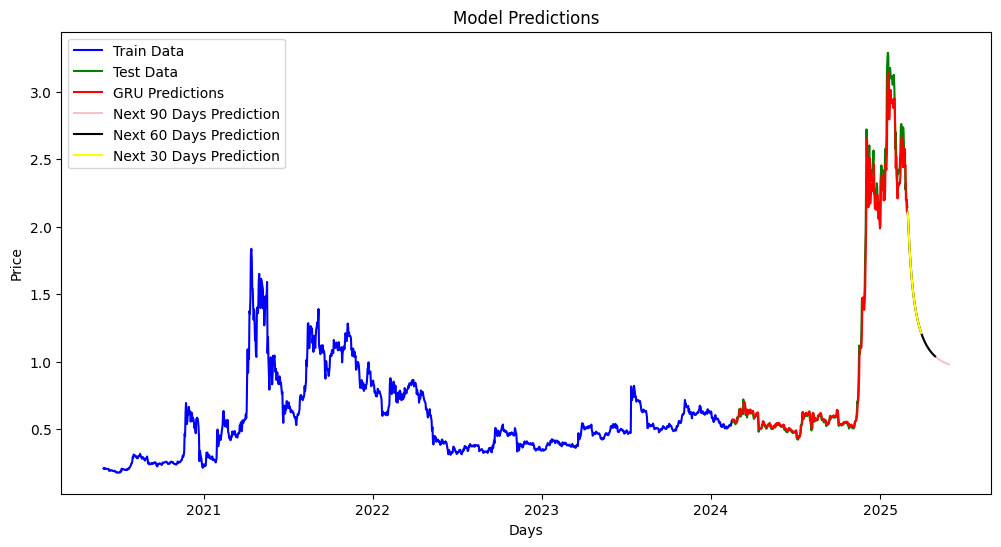

In [21]:
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_82.index[150:], train_data_XRP_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_82.index, test_data_XRP_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_82.index[0:], y_GRU_O_XRPcoin_82, label="GRU Predictions", color="red")

plt.plot(next_90_days_XRPcoin_82, predicted_prices_XRPcoin_90days_82, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_XRPcoin_82, predicted_prices_XRPcoin_60days_82, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_XRPCoin_82, predicted_prices_XRPcoin_82, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin82_predictions.png", dpi=300, bbox_inches="tight")
plt.show()

### Đánh giá mô hình

In [22]:
actual_prices_XRPcoin_82 = test_data_XRP_82.Price.values
actual_prices_XRPcoin_82 = np.reshape(actual_prices_XRPcoin_82, (-1, 1))

mape_XRPcoin_82 = calculate_mape(actual_prices_XRPcoin_82, y_GRU_O_XRPcoin_82)
mse_XRPcoin_82 = calculate_mse(actual_prices_XRPcoin_82, y_GRU_O_XRPcoin_82)
rmse_XRPcoin_82 = calculate_rmse(actual_prices_XRPcoin_82, y_GRU_O_XRPcoin_82)

print("MAPE: ", mape_XRPcoin_82)
print("MSE: ", mse_XRPcoin_82)
print("RMSE: ", rmse_XRPcoin_82)

MAPE:  3.472815867083221
MSE:  0.008564372765046511
RMSE:  0.09254389642243573


## Chia 7:3

In [23]:
# Setting 70 percent data for training
training_data_len_XRPcoin_73 = math.ceil(len(XRPCoin) * .7)

# Splitting the dataset
train_data_XRP_73 = XRPCoin[:training_data_len_XRPcoin_73]
test_data_XRP_73 = XRPCoin[training_data_len_XRPcoin_73:]

In [24]:
# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_XRPcoin_73 = scaled_XRPcoin[:training_data_len_XRPcoin_73]
scaled_test_XRPcoin_73 = scaled_XRPcoin[training_data_len_XRPcoin_73:]

In [25]:
X_train_XRPcoin_73 = []
y_train_XRPcoin_73 = []
for i in range(50, len(scaled_train_XRPcoin_73)):
    X_train_XRPcoin_73.append(scaled_train_XRPcoin_73[i-50:i, 0])
    y_train_XRPcoin_73.append(scaled_train_XRPcoin_73[i, 0])

In [26]:
last_50_days_train_XRPcoin_73 = scaled_train_XRPcoin_73[-50:]
full_test_input_XRPcoin_73 = np.concatenate((last_50_days_train_XRPcoin_73, scaled_test_XRPcoin_73), axis=0)
X_test_XRPcoin_73 = []
for i in range(50, len(full_test_input_XRPcoin_73)):
    X_test_XRPcoin_73.append(full_test_input_XRPcoin_73[i-50:i, 0])

In [27]:
# The data is converted to Numpy array
X_train_XRPcoin_73, y_train_XRPcoin_73 = np.array(X_train_XRPcoin_73), np.array(y_train_XRPcoin_73)

# Reshaping
X_train_XRPcoin_73 = np.reshape(X_train_XRPcoin_73, (X_train_XRPcoin_73.shape[0], X_train_XRPcoin_73.shape[1], 1))

# The data is converted to numpy array
X_test_XRPcoin_73 = np.array(X_test_XRPcoin_73)

# Reshaping
X_test_XRPcoin_73 = np.reshape(X_test_XRPcoin_73, (X_test_XRPcoin_73.shape[0], X_test_XRPcoin_73.shape[1], 1))

In [28]:
# Huấn luyện mô hình
regressorGRU_XRPcoin_73 = Sequential()
regressorGRU_XRPcoin_73.add(GRU(50, return_sequences=False, input_shape=(X_train_XRPcoin_73.shape[1], 1)))
regressorGRU_XRPcoin_73.add(Dense(1))

# Compile the regressorGRU_XRPcoin_73
regressorGRU_XRPcoin_73.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_XRPcoin_73.fit(X_train_XRPcoin_73, y_train_XRPcoin_73, epochs=100, batch_size=64, validation_split=0.3)
y_GRU_XRPcoin_73 = regressorGRU_XRPcoin_73.predict(X_test_XRPcoin_73)
y_GRU_O_XRPcoin_73 = scaler.inverse_transform(y_GRU_XRPcoin_73)
last_input_XRPcoin_73 = X_test_XRPcoin_73[-1]

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0196 - val_loss: 0.0057
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0064 - val_loss: 6.5124e-04
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0026 - val_loss: 3.7167e-04
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0011 - val_loss: 1.2919e-04
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 6.7587e-04 - val_loss: 9.3785e-05
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 5.5466e-04 - val_loss: 1.0530e-04
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 4.8243e-04 - val_loss: 8.7237e-05
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 4.9175e-04 - val_loss: 8.5178e-05
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 5.9415e-04 - val_loss: 1.1226e-04
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 4.4997e-04 - val_loss: 8.7119e-05
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 4.1436e-04 - val_loss: 8.13

### Dự đoán 30 ngày

In [29]:
# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_XRPcoin_73 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_XRPcoin_73 = regressorGRU_XRPcoin_73.predict(last_input_XRPcoin_73.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_XRPcoin_73.append(next_pred_XRPcoin_73[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_XRPcoin_73 = np.append(last_input_XRPcoin_73[1:], next_pred_XRPcoin_73)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_XRPcoin_73 = scaler.inverse_transform(np.array(predicted_prices_XRPcoin_73).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

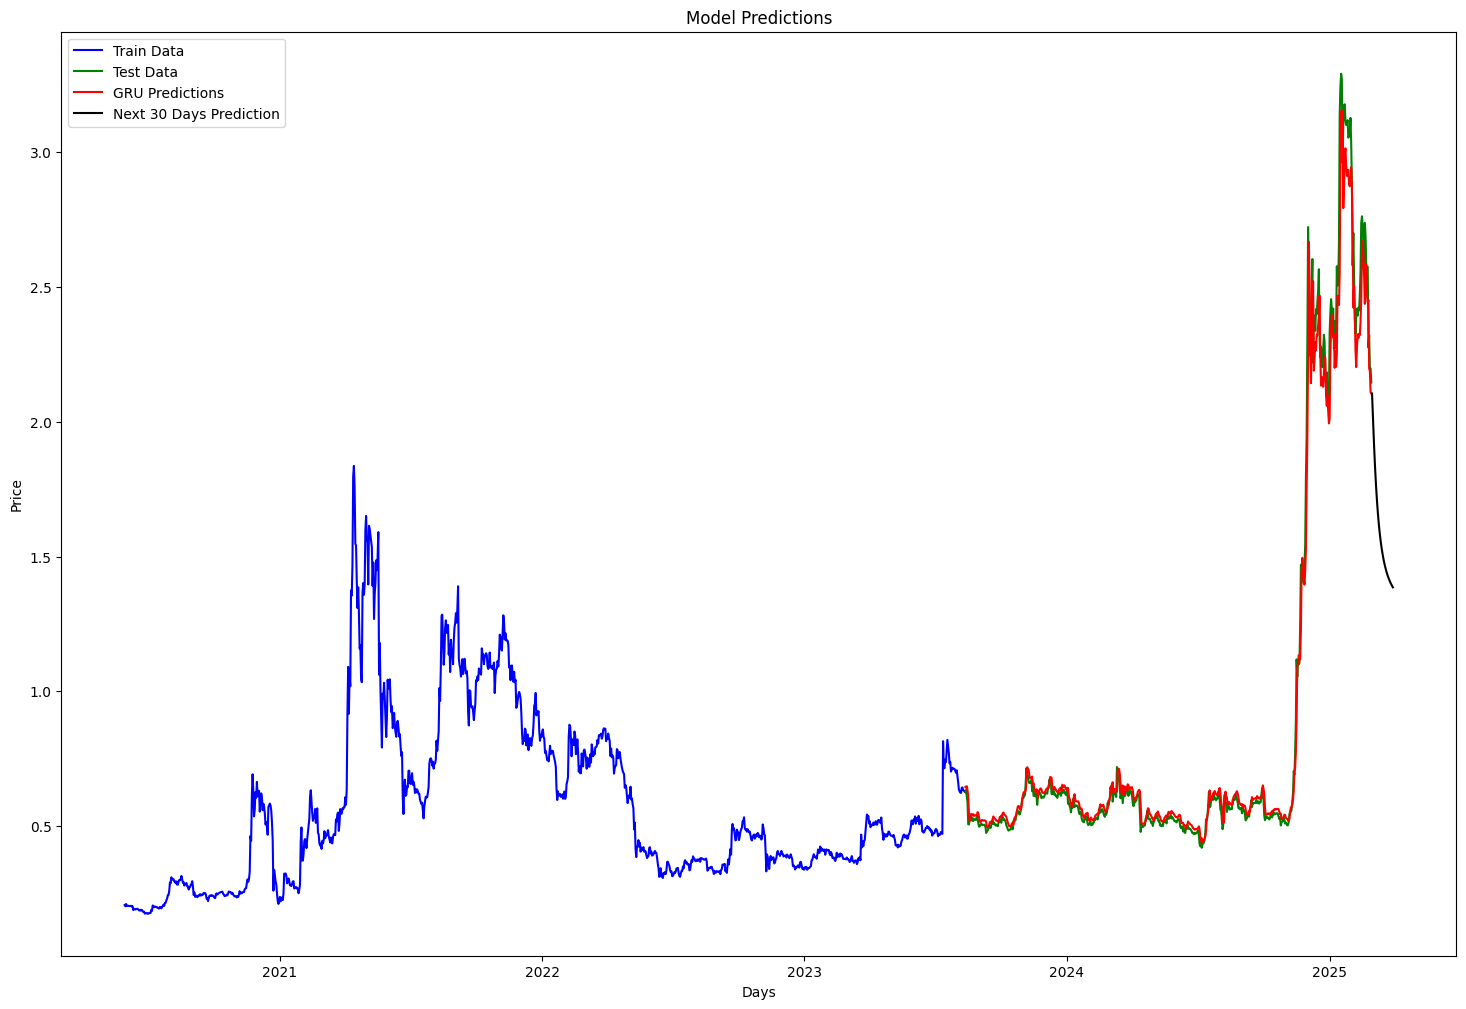

In [30]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_73.index[150:], train_data_XRP_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_73.index, test_data_XRP_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_73.index[0:], y_GRU_O_XRPcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_XRPCoin_73 = pd.date_range(test_data_XRP_73.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_XRPCoin_73, predicted_prices_XRPcoin_73, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin73_predictions_30days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 60 ngày

In [31]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_XRPcoin_60days_73 = X_test_XRPcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_XRPcoin_60days_73 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_XRPcoin_60days_73 = regressorGRU_XRPcoin_73.predict(last_input_XRPcoin_60days_73.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_XRPcoin_60days_73.append(next_pred_XRPcoin_60days_73[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_XRPcoin_60days_73 = np.append(last_input_XRPcoin_60days_73[1:], next_pred_XRPcoin_60days_73)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_XRPcoin_60days_73 = scaler.inverse_transform(np.array(predicted_prices_XRPcoin_60days_73).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

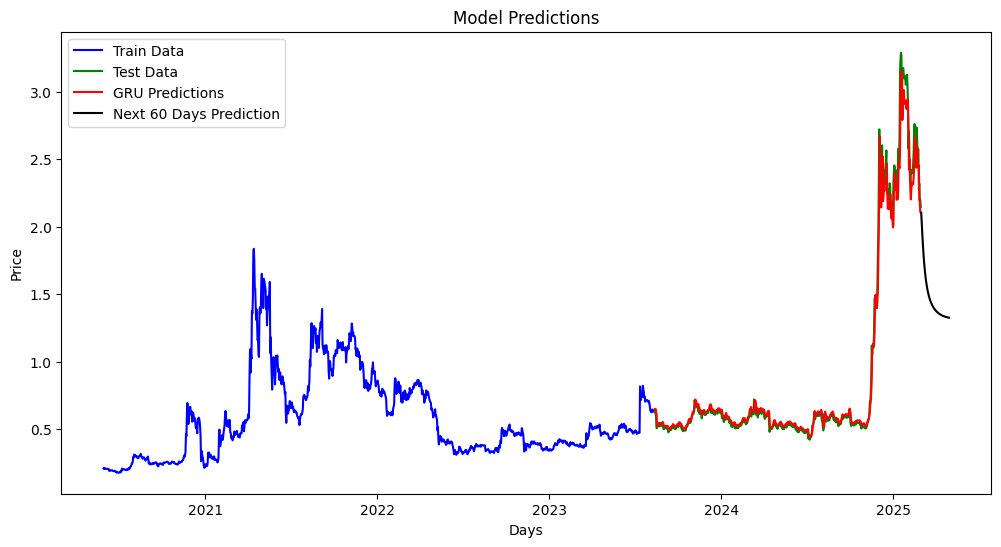

In [32]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 60 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_73.index[150:], train_data_XRP_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_73.index, test_data_XRP_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_73.index[0:], y_GRU_O_XRPcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 60 ngày tiếp theo
next_60_days_XRPcoin_73 = pd.date_range(test_data_XRP_73.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_XRPcoin_73, predicted_prices_XRPcoin_60days_73, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin73_predictions_60days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 90 ngày

In [33]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_XRPcoin_90days_73 = X_test_XRPcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_XRPcoin_90days_73 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_XRPcoin_90days_73 = regressorGRU_XRPcoin_73.predict(last_input_XRPcoin_90days_73.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_XRPcoin_90days_73.append(next_pred_XRPcoin_90days_73[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_XRPcoin_90days_73 = np.append(last_input_XRPcoin_90days_73[1:], next_pred_XRPcoin_90days_73)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_XRPcoin_90days_73 = scaler.inverse_transform(np.array(predicted_prices_XRPcoin_90days_73).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━

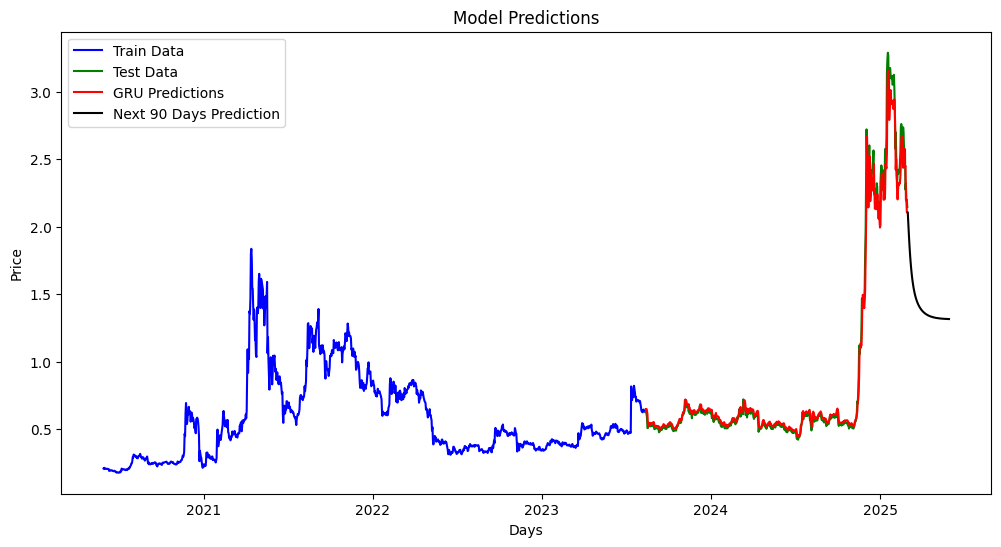

In [34]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 90 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_73.index[150:], train_data_XRP_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_73.index, test_data_XRP_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_73.index[0:], y_GRU_O_XRPcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 90 ngày tiếp theo
next_90_days_XRPcoin_73 = pd.date_range(test_data_XRP_73.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_XRPcoin_73, predicted_prices_XRPcoin_90days_73, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin73_predictions_90days.png", dpi=300, bbox_inches="tight")
plt.show()

### Biểu đồ dự đoán từ mô hình GRU

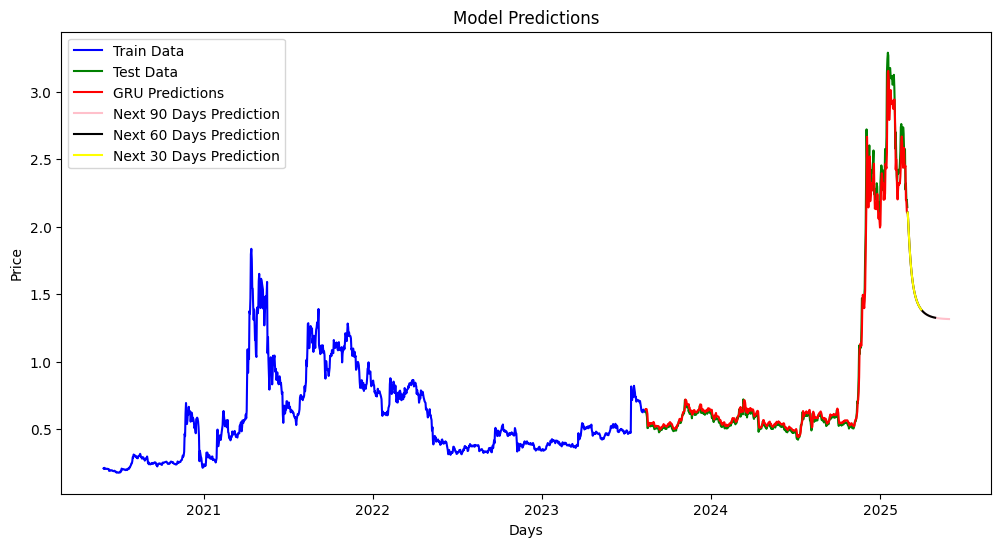

In [35]:
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_73.index[150:], train_data_XRP_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_73.index, test_data_XRP_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_73.index[0:], y_GRU_O_XRPcoin_73, label="GRU Predictions", color="red")

plt.plot(next_90_days_XRPcoin_73, predicted_prices_XRPcoin_90days_73, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_XRPcoin_73, predicted_prices_XRPcoin_60days_73, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_XRPCoin_73, predicted_prices_XRPcoin_73, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin73_predictions.png", dpi=300, bbox_inches="tight")
plt.show()

### Đánh giá mô hình

In [36]:
actual_prices_XRPcoin_73 = test_data_XRP_73.Price.values
actual_prices_XRPcoin_73 = np.reshape(actual_prices_XRPcoin_73, (-1, 1))

mape_XRPcoin_73 = calculate_mape(actual_prices_XRPcoin_73, y_GRU_O_XRPcoin_73)
mse_XRPcoin_73 = calculate_mse(actual_prices_XRPcoin_73, y_GRU_O_XRPcoin_73)
rmse_XRPcoin_73 = calculate_rmse(actual_prices_XRPcoin_73, y_GRU_O_XRPcoin_73)

print("MAPE: ", mape_XRPcoin_73)
print("MSE: ", mse_XRPcoin_73)
print("RMSE: ", rmse_XRPcoin_73)

MAPE:  4.027911665142659
MSE:  0.0059611699562813255
RMSE:  0.07720861322599523


## Chia 9:1

In [37]:
# Setting 90 percent data for training
training_data_len_XRPcoin_91 = math.ceil(len(XRPCoin) * .9)

# Splitting the dataset
train_data_XRP_91 = XRPCoin[:training_data_len_XRPcoin_91]
test_data_XRP_91 = XRPCoin[training_data_len_XRPcoin_91:]

In [38]:
# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_XRPcoin_91 = scaled_XRPcoin[:training_data_len_XRPcoin_91]
scaled_test_XRPcoin_91 = scaled_XRPcoin[training_data_len_XRPcoin_91:]

In [39]:
X_train_XRPcoin_91 = []
y_train_XRPcoin_91 = []
for i in range(50, len(scaled_train_XRPcoin_91)):
    X_train_XRPcoin_91.append(scaled_train_XRPcoin_91[i-50:i, 0])
    y_train_XRPcoin_91.append(scaled_train_XRPcoin_91[i, 0])

In [40]:
last_50_days_train_XRPcoin_91 = scaled_train_XRPcoin_91[-50:]
full_test_input_XRPcoin_91 = np.concatenate((last_50_days_train_XRPcoin_91, scaled_test_XRPcoin_91), axis=0)
X_test_XRPcoin_91 = []
for i in range(50, len(full_test_input_XRPcoin_91)):
    X_test_XRPcoin_91.append(full_test_input_XRPcoin_91[i-50:i, 0])

In [41]:
# The data is converted to Numpy array
X_train_XRPcoin_91, y_train_XRPcoin_91 = np.array(X_train_XRPcoin_91), np.array(y_train_XRPcoin_91)

# Reshaping
X_train_XRPcoin_91 = np.reshape(X_train_XRPcoin_91, (X_train_XRPcoin_91.shape[0], X_train_XRPcoin_91.shape[1], 1))

# The data is converted to numpy array
X_test_XRPcoin_91 = np.array(X_test_XRPcoin_91)

# Reshaping
X_test_XRPcoin_91 = np.reshape(X_test_XRPcoin_91, (X_test_XRPcoin_91.shape[0], X_test_XRPcoin_91.shape[1], 1))

In [42]:
# Huấn luyện mô hình
regressorGRU_XRPcoin_91 = Sequential()
regressorGRU_XRPcoin_91.add(GRU(50, return_sequences=False, input_shape=(X_train_XRPcoin_91.shape[1], 1)))
regressorGRU_XRPcoin_91.add(Dense(1))

# Compile the regressorGRU_XRPcoin_91
regressorGRU_XRPcoin_91.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_XRPcoin_91.fit(X_train_XRPcoin_91, y_train_XRPcoin_91, epochs=100, batch_size=64, validation_split=0.1)
y_GRU_XRPcoin_91 = regressorGRU_XRPcoin_91.predict(X_test_XRPcoin_91)
y_GRU_O_XRPcoin_91 = scaler.inverse_transform(y_GRU_XRPcoin_91)
last_input_XRPcoin_91 = X_test_XRPcoin_91[-1]

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0113 - val_loss: 1.6344e-04
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0022 - val_loss: 1.0587e-04
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 3.9899e-04 - val_loss: 8.9699e-05
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4.5072e-04 - val_loss: 8.3330e-05
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 3.8283e-04 - val_loss: 7.4705e-05
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 3.4617e-04 - val_loss: 7.1472e-05
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 2.7671e-04 - val_loss: 7.3394e-05
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 2.9710e-04 - val_loss: 6.9706e-05
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 2.6492e-04 - val_loss: 6.7401e-05
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 2.9242e-04 - val_loss: 6.9260e-05
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 2.8304e-04 - val_

### Dự đoán 30 ngày

In [43]:
# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_XRPcoin_91 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_XRPcoin_91 = regressorGRU_XRPcoin_91.predict(last_input_XRPcoin_91.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_XRPcoin_91.append(next_pred_XRPcoin_91[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_XRPcoin_91 = np.append(last_input_XRPcoin_91[1:], next_pred_XRPcoin_91)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_XRPcoin_91 = scaler.inverse_transform(np.array(predicted_prices_XRPcoin_91).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

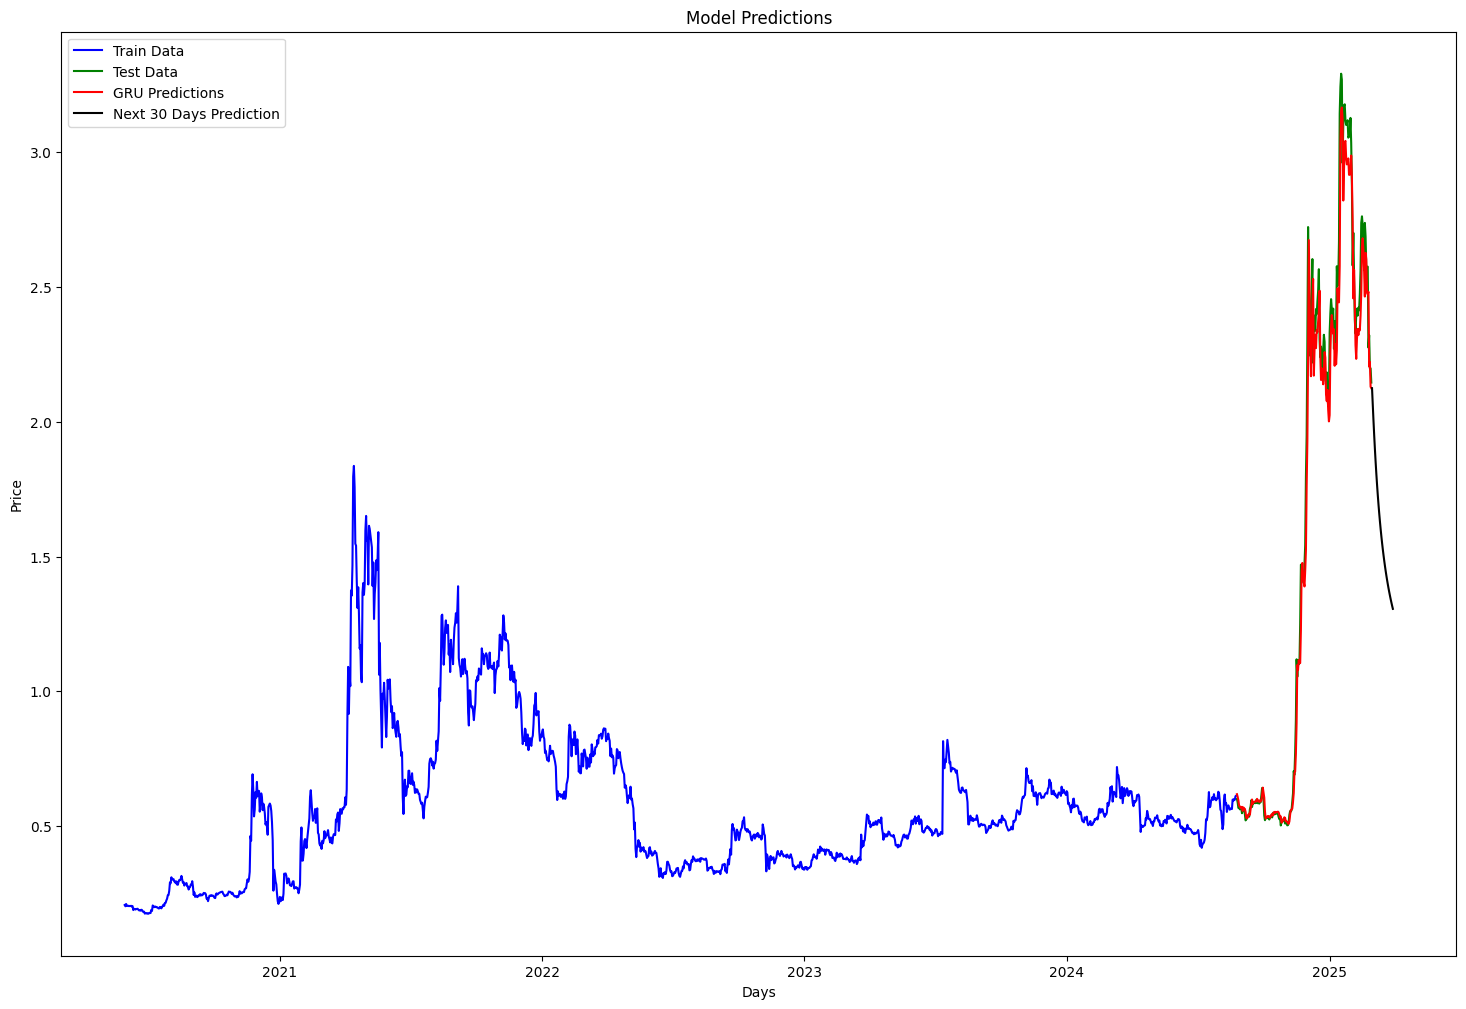

In [44]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_91.index[150:], train_data_XRP_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_91.index, test_data_XRP_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_91.index[0:], y_GRU_O_XRPcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_XRPCoin_91 = pd.date_range(test_data_XRP_91.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_XRPCoin_91, predicted_prices_XRPcoin_91, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin91_predictions_30days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 60 ngày

In [45]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_XRPcoin_60days_91 = X_test_XRPcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_XRPcoin_60days_91 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_XRPcoin_60days_91 = regressorGRU_XRPcoin_91.predict(last_input_XRPcoin_60days_91.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_XRPcoin_60days_91.append(next_pred_XRPcoin_60days_91[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_XRPcoin_60days_91 = np.append(last_input_XRPcoin_60days_91[1:], next_pred_XRPcoin_60days_91)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_XRPcoin_60days_91 = scaler.inverse_transform(np.array(predicted_prices_XRPcoin_60days_91).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

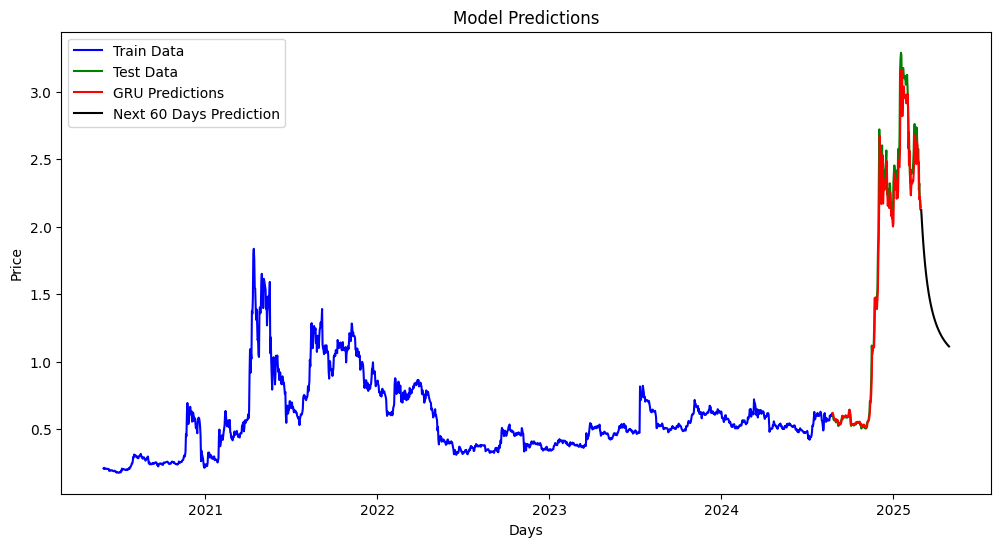

In [47]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 60 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_91.index[150:], train_data_XRP_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_91.index, test_data_XRP_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_91.index[0:], y_GRU_O_XRPcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 60 ngày tiếp theo
next_60_days_XRPcoin_91 = pd.date_range(test_data_XRP_91.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_XRPcoin_91, predicted_prices_XRPcoin_60days_91, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin91_predictions_60days.png", dpi=300, bbox_inches="tight")
plt.show()

### Dự đoán 90 ngày

In [48]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_XRPcoin_90days_91 = X_test_XRPcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_XRPcoin_90days_91 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_XRPcoin_90days_91 = regressorGRU_XRPcoin_91.predict(last_input_XRPcoin_90days_91.reshape(1, 50, 1))

    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_XRPcoin_90days_91.append(next_pred_XRPcoin_90days_91[0][0])

    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_XRPcoin_90days_91 = np.append(last_input_XRPcoin_90days_91[1:], next_pred_XRPcoin_90days_91)

# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_XRPcoin_90days_91 = scaler.inverse_transform(np.array(predicted_prices_XRPcoin_90days_91).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

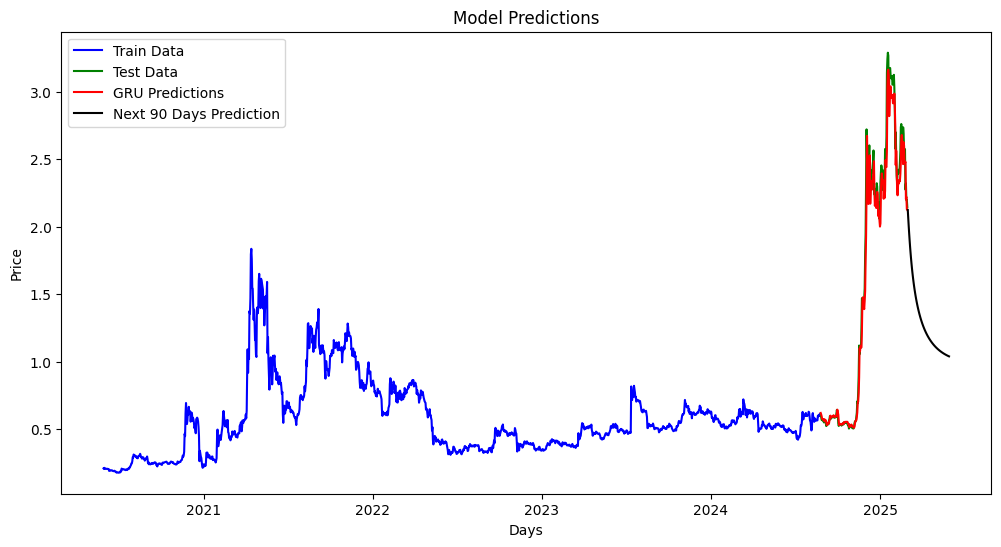

In [49]:
# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 90 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_91.index[150:], train_data_XRP_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_91.index, test_data_XRP_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_91.index[0:], y_GRU_O_XRPcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 90 ngày tiếp theo
next_90_days_XRPcoin_91 = pd.date_range(test_data_XRP_91.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_XRPcoin_91, predicted_prices_XRPcoin_90days_91, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin91_predictions_90days.png", dpi=300, bbox_inches="tight")
plt.show()

### Biểu đồ dự đoán từ mô hình GRU

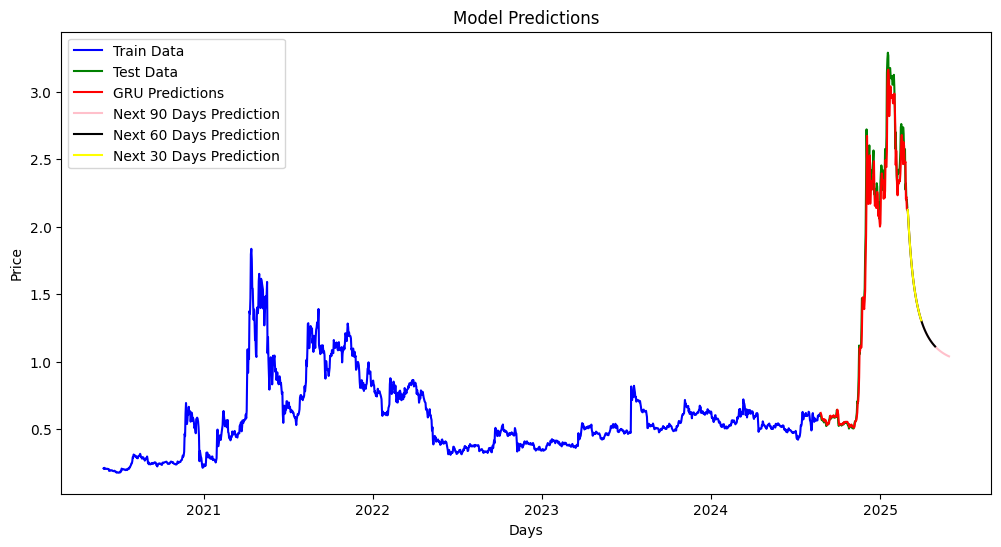

In [50]:
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_XRP_91.index[150:], train_data_XRP_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_XRP_91.index, test_data_XRP_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_XRP_91.index[0:], y_GRU_O_XRPcoin_91, label="GRU Predictions", color="red")

plt.plot(next_90_days_XRPcoin_91, predicted_prices_XRPcoin_90days_91, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_XRPcoin_91, predicted_prices_XRPcoin_60days_91, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_XRPCoin_91, predicted_prices_XRPcoin_91, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.savefig("XRPcoin91_predictions.png", dpi=300, bbox_inches="tight")
plt.show()

### Đánh giá mô hình

In [51]:
actual_prices_XRPcoin_91 = test_data_XRP_91.Price.values
actual_prices_XRPcoin_91 = np.reshape(actual_prices_XRPcoin_91, (-1, 1))

mape_XRPcoin_91 = calculate_mape(actual_prices_XRPcoin_91, y_GRU_O_XRPcoin_91)
mse_XRPcoin_91 = calculate_mse(actual_prices_XRPcoin_91, y_GRU_O_XRPcoin_91)
rmse_XRPcoin_91 = calculate_rmse(actual_prices_XRPcoin_91, y_GRU_O_XRPcoin_91)

print("MAPE: ", mape_XRPcoin_91)
print("MSE: ", mse_XRPcoin_91)
print("RMSE: ", rmse_XRPcoin_91)

MAPE:  3.9646797654085173
MSE:  0.014279785279960572
RMSE:  0.11949805554886896
